# House Price Prediction

> House Price Prediction Case Study Analysis <br>
Author : Gnanaprakash S <br>
Date : 25-11-2023

## Table of Contents
* [Problem Statement](#problem-statement)
   * [Business Goal](#goals)
* [Step 1: Including Necessary Libraries](#include_libraries)
* [Step 2: Reading and Understanding the Data](#data_understand)
* [Step 3: EDA](#eda)
    * [Data Reduction and Data Cleaning](#data_cleaning)
    * [Check Duplication](#check_duplication)
    * [Missing Value Treatment](#mv_treatment)
    * [Seperating numerical and categorical columns](#num_and_cat)
    * [Outlier Treatment](#ot_treatment)
    * [Univariate Analysis](#uv_analysis)
    * [Bivariate Analysis](#bv_analysis)
* [Step 4: Encoding](#encoding)
* [Step 5: Train Test Split](#test_split)
* [Step 6: Rescaling the Features](#scaling)
* [Step 7: Feature Selection](#selection)
* [Step 8: Building model using statsmodel, for the detailed statistics](#buildmodel)
* [Step 9: Residual Analysis of the train data](#res_analysis)
* [Step 10: Making Predictions Using the Final Model](#final_model)
* [Step 11: Model Evaluation](#model_evaluation)
* [Conclusions](#conclusions)

## Problem Statement <a class="anchor" id="problem-statement"></a>

A US-based housing company named ***Surprise Housing*** has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

### <font color="brown"> Business Goal: </font> <a class="anchor" id="goals"></a>
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Step 1: Including Necessary Libraries<a class="anchor" id="include_libraries"></a>

In [2949]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# To get versions
import sklearn
import matplotlib
import statsmodels
# python version
from platform import python_version
from colorama import Fore, Back, Style

In [2950]:
# Neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2951]:
# Skylearn libraries modules
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing

import statsmodels.api as sm  

In [2952]:
# Get all the library versions
print('Library Versions:')
print('Python:',python_version(),'| Numpy:',np.__version__,'| Pandas:',pd.__version__, '| Seaborn:', sns.__version__, '| Matplot:', matplotlib.__version__, '| Sklearn:', sklearn.__version__, '| statsmodels:', statsmodels.__version__)

Library Versions:
Python: 3.11.3 | Numpy: 1.24.3 | Pandas: 1.5.3 | Seaborn: 0.12.2 | Matplot: 3.7.1 | Sklearn: 1.2.2 | statsmodels: 0.13.5


## Step 2: Reading and Understanding the Data <a class="anchor" id="data_understand"></a>

In [2953]:
# Read the given CSV file, and view some sample records
house_sale = pd.read_csv('house_sale_in_australia.csv')
house_sale.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub   
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub   
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub   
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub   
4   5          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None   
2            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       196.0        Gd        TA      PConc       Gd       TA           No          GLQ   
1         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ   
4       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0         706          Unf           0        150          856    GasA        Ex          Y   
1         978          Unf           0        284         1262    GasA        Ex          Y   
2         486          Unf           0        434          920    GasA        Ex          Y   
3         216          Unf           0        540          756    GasA        Gd          Y   
4         655          Unf           0        490         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0      SBrkr       856       854             0       1710             1             0         2   
1      SBrkr      1262         0             0       1262             0             1         2   
2      SBrkr       920       866             0       1786             1             0         2   
3      SBrkr       961       756             0       1717             1             0         1   
4      SBrkr      1145      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0         1             3             1          Gd             8        Typ           0   
1         0             3             1          TA             6        Typ           1   
2         1             3             1          Gd             6        Typ           1   
3         0             3             1          Gd             7        Typ           1   
4         1             4             1          Gd             9        Typ           1   

  FireplaceQ

In [2954]:

# Number of rows and columns
print('Dataframe Shape:', house_sale.shape)

Dataframe Shape: (1460, 81)


In [2955]:
# Based on Dataframe shape and data seen from head(), arranging the display size to make it more visible
pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

In [2956]:
house_sale.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub   
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub   
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub   
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub   
4   5          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub   
5   6          50       RL         85.0    14115   Pave   NaN      IR1         Lvl    AllPub   
6   7          20       RL         75.0    10084   Pave   NaN      Reg         Lvl    AllPub   
7   8          60       RL          NaN    10382   Pave   NaN      IR1         Lvl    AllPub   
8   9          50       RM         51.0     6120   Pave   NaN      Reg         Lvl    AllPub   
9  10         190       RL         50.0     7420   Pave   NaN      Reg         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8   
5    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1.5Fin            5   
6    Inside       Gtl      Somerst       Norm       Norm     1Fam     1Story            8   
7    Corner       Gtl       NWAmes       PosN       Norm     1Fam     2Story            7   
8    Inside       Gtl      OldTown     Artery       Norm     1Fam     1.5Fin            7   
9    Corner       Gtl      BrkSide     Artery     Artery   2fmCon     1.5Unf            5   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None   
2            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5            5       1993          1995     Gable  CompShg     VinylSd     VinylSd       None   
6            5       2004          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7            6       1973          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8            5       1931          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9            6       1939          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       196.0        Gd        TA      PConc       Gd       TA           No          GLQ   
1         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ   
4       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ   
5         0.0        TA        TA       Wood       Gd       TA           No          GLQ   
6       186.0        Gd        TA      PConc       Ex       TA           Av          GLQ   
7       240.0        TA        TA     CBlock       Gd       TA           Mn          ALQ   
8         0.0        TA   

In [2957]:
print('Columns present in the data:\n', house_sale.columns)

Columns present in the data:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'P

Basic inspection of dataframe:

In [2958]:
# Print the Dataframe information
house_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### <font color="brown">Understanding from Source:</font>  <a class="anchor" id="source_understanding"></a>
- Data source are consider as ***private*** data and belongs to ***Surprise Housing*** collected the ***house sales in Australia***.
- There are ***1460 rows***  and ***81 columns*** present.
- The column ***SalePrice*** is considered to be the base for the analysis (Will be used in Y-axis)
    - <font color="blue"> ***SalePrice*** - house sold price</font> 

## Step 3: EDA <a class="anchor" id="eda"></a>

In [2959]:
house_sale.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub   
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub   
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub   
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub   
4   5          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None   
2            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       196.0        Gd        TA      PConc       Gd       TA           No          GLQ   
1         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ   
4       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0         706          Unf           0        150          856    GasA        Ex          Y   
1         978          Unf           0        284         1262    GasA        Ex          Y   
2         486          Unf           0        434          920    GasA        Ex          Y   
3         216          Unf           0        540          756    GasA        Gd          Y   
4         655          Unf           0        490         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0      SBrkr       856       854             0       1710             1             0         2   
1      SBrkr      1262         0             0       1262             0             1         2   
2      SBrkr       920       866             0       1786             1             0         2   
3      SBrkr       961       756             0       1717             1             0         1   
4      SBrkr      1145      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0         1             3             1          Gd             8        Typ           0   
1         0             3             1          TA             6        Typ           1   
2         1             3             1          Gd             6        Typ           1   
3         0             3             1          Gd             7        Typ           1   
4         1             4             1          Gd             9        Typ           1   

  FireplaceQ

In [2960]:
house_sale.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452   
std      30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534   
std     386.587738   436.528436     48.623081   525.480383      0.518911      0.238753   
min     334.000000     0.000000      0.000000   334.000000      0.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      1.565068     0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.550916     0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000     0.000000      0.000000      0.000000      2.000000     0.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000     0.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000     1.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000     1.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110   
std      24.689725     0.747315   213.804841   125.338794    66.256028      61.119149   
min    1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000   
75%    2002.000000     2.000000   576.000000   168.000000  

### Data Reduction and Data Cleaning<a class="anchor" id="data_cleaning"></a>

In [2961]:
house_sale.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub   
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub   
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub   
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub   
4   5          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None   
2            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       196.0        Gd        TA      PConc       Gd       TA           No          GLQ   
1         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ   
4       350.0        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0         706          Unf           0        150          856    GasA        Ex          Y   
1         978          Unf           0        284         1262    GasA        Ex          Y   
2         486          Unf           0        434          920    GasA        Ex          Y   
3         216          Unf           0        540          756    GasA        Gd          Y   
4         655          Unf           0        490         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0      SBrkr       856       854             0       1710             1             0         2   
1      SBrkr      1262         0             0       1262             0             1         2   
2      SBrkr       920       866             0       1786             1             0         2   
3      SBrkr       961       756             0       1717             1             0         1   
4      SBrkr      1145      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0         1             3             1          Gd             8        Typ           0   
1         0             3             1          TA             6        Typ           1   
2         1             3             1          Gd             6        Typ           1   
3         0             3             1          Gd             7        Typ           1   
4         1             4             1          Gd             9        Typ           1   

  FireplaceQ

In [2962]:
# Id has similar to index values
house_sale.drop(columns='Id', inplace=True)

In [2963]:
# Check the unique values
for column in house_sale.columns:
    unique_values = house_sale[column].nunique()
    if unique_values <= 2:
        print(f"Unique values in '{column}':")
        print(house_sale[column].unique())

Unique values in 'Street':
['Pave' 'Grvl']
Unique values in 'Alley':
[nan 'Grvl' 'Pave']
Unique values in 'Utilities':
['AllPub' 'NoSeWa']
Unique values in 'CentralAir':
['Y' 'N']


#### Note: There is no only one single unique values

### Check Duplication <a class="anchor" id="check_duplication"></a>


In [2964]:
# Check for duplicate data
dups = house_sale.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Missing value treament <a class="anchor" id="mv_treatment"></a>

In [2965]:
# Marking 80% as thresholds for number of missing data columns in a row
row_threshold = 0.8 * len(house_sale.columns)

# Marking 80% as thresholds for number of missing data columns in total row
column_threshold = 0.8 * len(house_sale)

In [2966]:
rows_with_nulls = house_sale[house_sale.isnull().sum(axis=1) >= row_threshold]

# Display the DataFrame with rows where 80% or more of columns are null
print("Rows with 80% or more null values:")
print(rows_with_nulls.sum().sum())

Rows with 80% or more null values:
0.0


In [2967]:
# Check total missing data
missing_data = house_sale.isnull()
missing_data.sum().sum()

6965

In [2968]:
# Check the columns which are missing data
missing_data_counts = missing_data.sum()
print(missing_data_counts[missing_data_counts > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [2969]:
# How much percentage of each column has missing
missing_data_in_percentage = missing_data_counts/(len(missing_data))*100
print(missing_data_in_percentage[missing_data_in_percentage > 0.0000])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


#### <font color="brown">Understanding from Data Analysis:</font>
- There percentage of missing values for the columns Alley, PoolQC, Fence, and MiscFeature are > 80%
- There is no duplicate data.
- There is no row with > 80 % data missing

In [2970]:
# Incase missing value added as invalid data, there is no similar strings as useful data in dataset, 
# So replace invalid data as nan
missing_values = ["n/a", "na", "nan", "NaN"]
house_sale.replace(missing_values, np.nan, inplace=True)

In [2971]:
# Drop columns with more than 80% null values
house_sale.dropna(axis=1, thresh=column_threshold, inplace=True)

In [2972]:
print('Dataframe Shape:', house_sale.shape)

Dataframe Shape: (1460, 75)


In [2973]:
numerical_columns = None
categorical_columns = None
def updated_numerical_categorical_columns():
    global numerical_columns, categorical_columns
    # Separate numerical and categorical columns
    numerical_columns = house_sale.select_dtypes((int, float)).columns
    categorical_columns = house_sale.select_dtypes(object).columns
    print('Numberical columns:',numerical_columns)
    print('Categorical columns:',categorical_columns)

In [2974]:
updated_numerical_categorical_columns()

Numberical columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heatin

In [2975]:
house_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [2976]:
# Check the amount of missing values in the columns
for column in numerical_columns:
    print(column, house_sale[column].median())
    house_sale[column] = house_sale[column].fillna(house_sale[column].median())

MSSubClass 50.0
LotFrontage 69.0
LotArea 9478.5
OverallQual 6.0
OverallCond 5.0
YearBuilt 1973.0
YearRemodAdd 1994.0
MasVnrArea 0.0
BsmtFinSF1 383.5
BsmtFinSF2 0.0
BsmtUnfSF 477.5
TotalBsmtSF 991.5
1stFlrSF 1087.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 1464.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 2.0
HalfBath 0.0
BedroomAbvGr 3.0
KitchenAbvGr 1.0
TotRmsAbvGrd 6.0
Fireplaces 1.0
GarageYrBlt 1980.0
GarageCars 2.0
GarageArea 480.0
WoodDeckSF 0.0
OpenPorchSF 25.0
EnclosedPorch 0.0
3SsnPorch 0.0
ScreenPorch 0.0
PoolArea 0.0
MiscVal 0.0
MoSold 6.0
YrSold 2008.0
SalePrice 163000.0


In [2977]:
newh = house_sale
for column in categorical_columns:
    print(column, house_sale[column].mode()[0])
    house_sale[column] = house_sale[column].fillna(house_sale[column].mode()[0])

MSZoning RL
Street Pave
LotShape Reg
LandContour Lvl
Utilities AllPub
LotConfig Inside
LandSlope Gtl
Neighborhood NAmes
Condition1 Norm
Condition2 Norm
BldgType 1Fam
HouseStyle 1Story
RoofStyle Gable
RoofMatl CompShg
Exterior1st VinylSd
Exterior2nd VinylSd
MasVnrType None
ExterQual TA
ExterCond TA
Foundation PConc
BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Heating GasA
HeatingQC Ex
CentralAir Y
Electrical SBrkr
KitchenQual TA
Functional Typ
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA
PavedDrive Y
SaleType WD
SaleCondition Normal


In [2978]:
# Check the years are caetegorical or by count 'MoSold'
mon_years = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']
for each in mon_years:
    print(house_sale[each].unique())
    print(house_sale[each].value_counts())

[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 198

#### Map back to original values to make it explainable/understanding in EDA
   - YearBuilt : as float change to year
   - YearRemodAdd : as float change to year
   - GarageYrBlt : as float change to year
   - YrSold : as float change to year strings as categorical data
   - MoSold : as (1 - 12) change to month ('Jan', 'Feb', etc) as categorical data
   - LotFrontage, MasVnrArea as int

In [2979]:
house_sale['YearBuilt'] = pd.to_datetime(house_sale['YearBuilt'], format='%Y').dt.year
house_sale['YearRemodAdd'] = pd.to_datetime(house_sale['YearRemodAdd'], format='%Y').dt.year
house_sale['GarageYrBlt'] = pd.to_datetime(house_sale['YearRemodAdd'], format='%Y').dt.year
house_sale['LotFrontage'] = house_sale['LotFrontage'].astype(int)
house_sale['MasVnrArea'] = house_sale['MasVnrArea'].astype(int)

house_sale['YrSold'] = pd.to_datetime(house_sale['YrSold'], format='%Y').dt.year.astype(str)
house_sale['MoSold'] = pd.to_datetime(house_sale['MoSold'], format='%m').dt.strftime('%b')

In [2980]:
house_sale.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig  \
0          60       RL           65     8450   Pave      Reg         Lvl    AllPub    Inside   
1          20       RL           80     9600   Pave      Reg         Lvl    AllPub       FR2   
2          60       RL           68    11250   Pave      IR1         Lvl    AllPub    Inside   
3          70       RL           60     9550   Pave      IR1         Lvl    AllPub    Corner   
4          60       RL           84    14260   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace         196   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd       None           0   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace         162   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None           0   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace         350   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ         706   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ         978   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ         486   
3        TA        TA     BrkTil       TA       Gd           No          ALQ         216   
4        Gd        TA      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0          Unf           0        150          856    GasA        Ex          Y      SBrkr   
1          Unf           0        284         1262    GasA        Ex          Y      SBrkr   
2          Unf           0        434          920    GasA        Ex          Y      SBrkr   
3          Unf           0        540          756    GasA        Gd          Y      SBrkr   
4          Unf           0        490         1145    GasA        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0       856       854             0       1710             1             0         2         1   
1      1262         0             0       1262             0             1         2         0   
2       920       866             0       1786             1             0         2         1   
3       961       756             0       1717             1             0         1         0   
4      1145      1053             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             3             1          Gd             8        Typ           0     Attchd   
1             3             1          TA             6        Typ           1     Attchd   
2             3             1          Gd             6        Typ           1     Attchd   
3             3             1          Gd             7        Typ           1     Detchd   
4             4             1          Gd             9        Typ           1     Attchd   

   Gar

In [2981]:
house_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   int32 
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [2982]:
print('Dataframe Shape:', house_sale.shape)

Dataframe Shape: (1460, 75)


### Seperate Numerical and Categorical data <a class="anchor" id="num_and_cat"></a>

In [2983]:
updated_numerical_categorical_columns()

Numberical columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')
Categorical columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'Ce

### Outlier Treatment <a class="anchor" id="ot_treatment"></a>

In [2984]:
# Verify the outlier using the plot
def plot_to_view_outlier(nrow, ncol, data, dataframe, r_len=15, c_len=35):
    # Number of rows in the Subplot
    a = nrow
    # Number of columns in the Subplot
    b = ncol
    # Index to be printed on Subplot
    c = 1

    fig = plt.figure(figsize=(30,40))
    fig.set_size_inches(r_len, c_len)

    for i in data:
        plt.subplot(a,b,c)
        plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=16)
        plt.xlabel(i,fontsize=14)
        plt.ylabel(i,fontsize=14)
        plt.xticks(fontsize=10,rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=14)
        sns.boxplot(dataframe[i],color = 'r') #check the estimator 'mean' here by default
        c = c+1

    plt.tight_layout()
    plt.show();

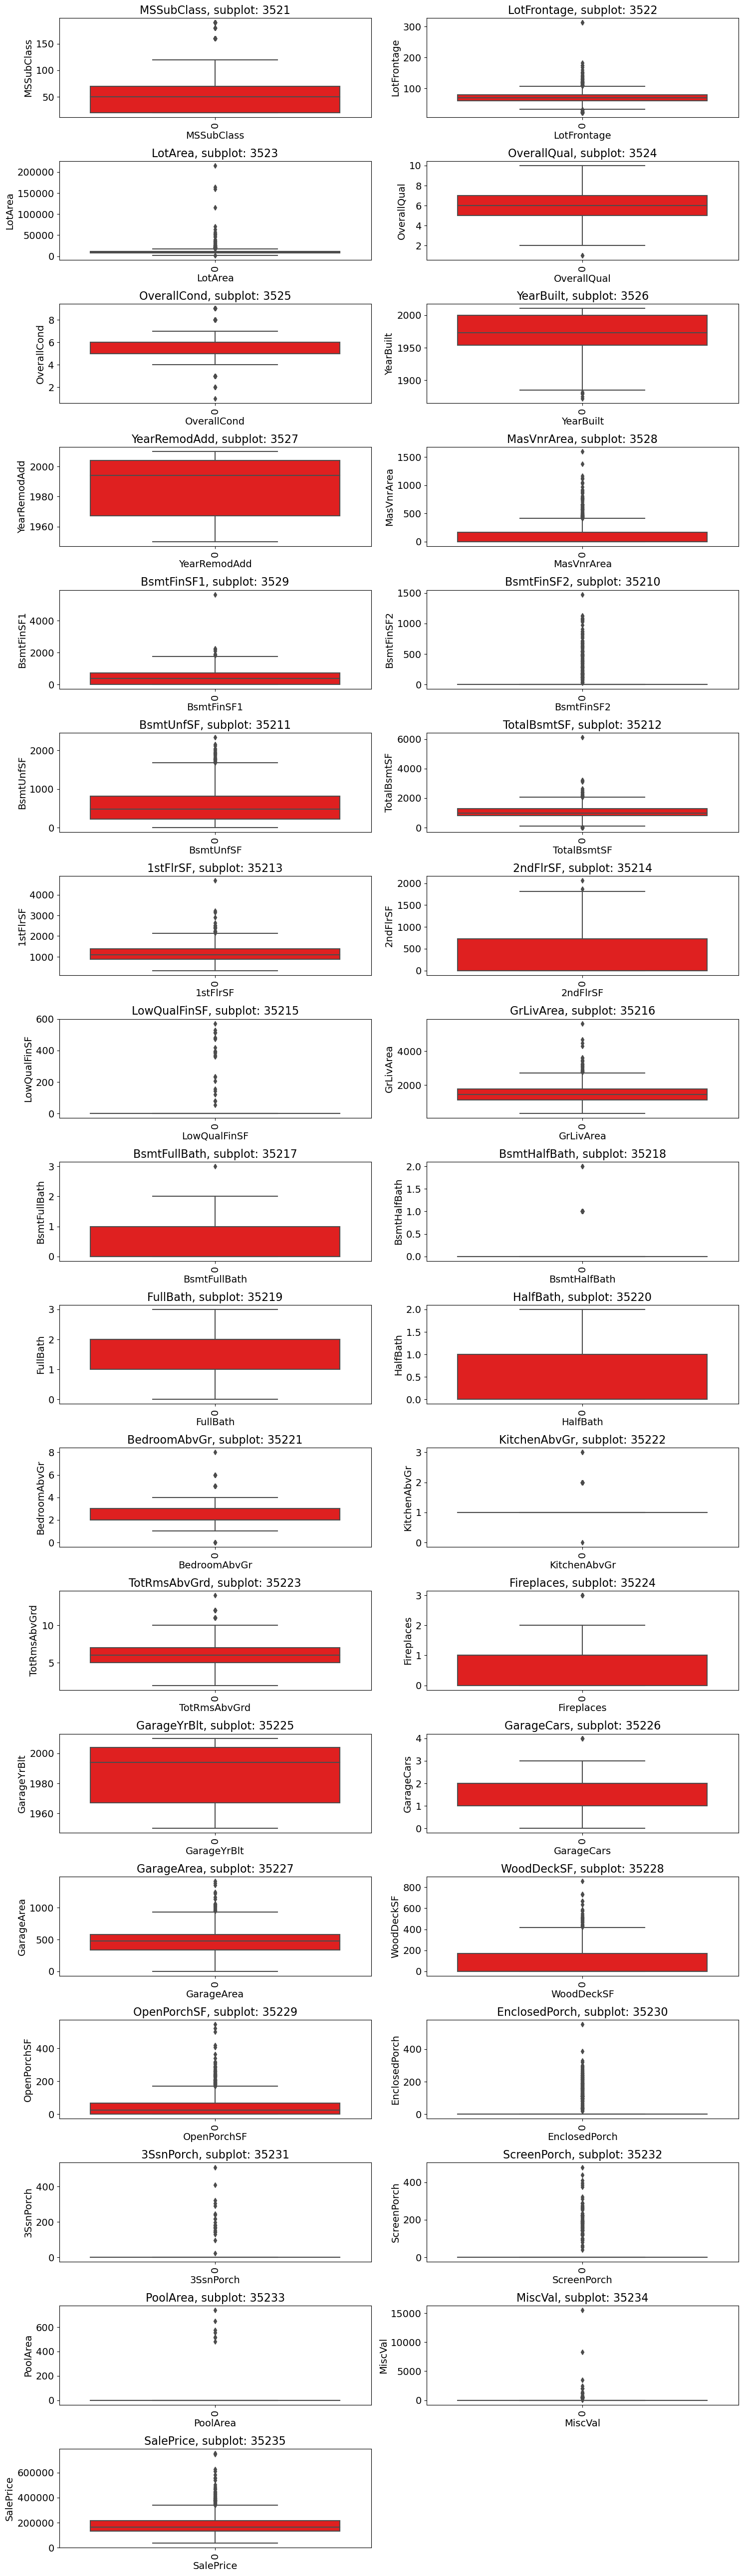

In [2985]:
# Identify any outliers in numerical data
plot_to_view_outlier(len(numerical_columns), 2, numerical_columns, house_sale[numerical_columns], r_len=15, c_len=100)

In [2986]:
# Outlier Treament using IQR Technique
def treat_outlier(col_name, col, new_line='\n'):
    q1,q3 = col.quantile([0.25,0.75])
    IQR = q3-q1
    print(f"Col: '{col_name}' q1: '{q1}', q3: '{q3}' IQR:{IQR}", end=new_line)
    lower_range = q1-(1.5*IQR)
    upper_range = q3 + (1.5*IQR)
    return lower_range, upper_range

In [2987]:
total_row = len(house_sale)
# check the outlier for numerical columns
for each_column in numerical_columns:
    low_outlier,up_outlier = treat_outlier(each_column, house_sale[each_column], new_line=' ')
    outlier_count = len(house_sale[(house_sale[each_column] >= low_outlier) & (house_sale[each_column] <= up_outlier)])
    outlier_per = ((total_row-outlier_count)/total_row )*100
    print("outlier %.2f" % outlier_per, "%")

Col: 'MSSubClass' q1: '20.0', q3: '70.0' IQR:50.0 outlier 7.05 %
Col: 'LotFrontage' q1: '60.0', q3: '79.0' IQR:19.0 outlier 7.26 %
Col: 'LotArea' q1: '7553.5', q3: '11601.5' IQR:4048.0 outlier 4.73 %
Col: 'OverallQual' q1: '5.0', q3: '7.0' IQR:2.0 outlier 0.14 %
Col: 'OverallCond' q1: '5.0', q3: '6.0' IQR:1.0 outlier 8.56 %
Col: 'YearBuilt' q1: '1954.0', q3: '2000.0' IQR:46.0 outlier 0.48 %
Col: 'YearRemodAdd' q1: '1967.0', q3: '2004.0' IQR:37.0 outlier 0.00 %
Col: 'MasVnrArea' q1: '0.0', q3: '164.25' IQR:164.25 outlier 6.71 %
Col: 'BsmtFinSF1' q1: '0.0', q3: '712.25' IQR:712.25 outlier 0.48 %
Col: 'BsmtFinSF2' q1: '0.0', q3: '0.0' IQR:0.0 outlier 11.44 %
Col: 'BsmtUnfSF' q1: '223.0', q3: '808.0' IQR:585.0 outlier 1.99 %
Col: 'TotalBsmtSF' q1: '795.75', q3: '1298.25' IQR:502.5 outlier 4.18 %
Col: '1stFlrSF' q1: '882.0', q3: '1391.25' IQR:509.25 outlier 1.37 %
Col: '2ndFlrSF' q1: '0.0', q3: '728.0' IQR:728.0 outlier 0.14 %
Col: 'LowQualFinSF' q1: '0.0', q3: '0.0' IQR:0.0 outlier 1.78 %


In [2988]:
# There is no extreme outliers based on the outlier percentage, so no need to drop a column based on extreme outliers
# Treat the outlier for numerical columns
for each_column in numerical_columns:
    lrsale,ursale = treat_outlier(each_column, house_sale[each_column])
    house_sale[each_column] = np.where(house_sale[each_column]>ursale,ursale,house_sale[each_column])
    house_sale[each_column] = np.where(house_sale[each_column]<lrsale,lrsale,house_sale[each_column])

Col: 'MSSubClass' q1: '20.0', q3: '70.0' IQR:50.0
Col: 'LotFrontage' q1: '60.0', q3: '79.0' IQR:19.0
Col: 'LotArea' q1: '7553.5', q3: '11601.5' IQR:4048.0
Col: 'OverallQual' q1: '5.0', q3: '7.0' IQR:2.0
Col: 'OverallCond' q1: '5.0', q3: '6.0' IQR:1.0
Col: 'YearBuilt' q1: '1954.0', q3: '2000.0' IQR:46.0
Col: 'YearRemodAdd' q1: '1967.0', q3: '2004.0' IQR:37.0
Col: 'MasVnrArea' q1: '0.0', q3: '164.25' IQR:164.25
Col: 'BsmtFinSF1' q1: '0.0', q3: '712.25' IQR:712.25
Col: 'BsmtFinSF2' q1: '0.0', q3: '0.0' IQR:0.0
Col: 'BsmtUnfSF' q1: '223.0', q3: '808.0' IQR:585.0
Col: 'TotalBsmtSF' q1: '795.75', q3: '1298.25' IQR:502.5
Col: '1stFlrSF' q1: '882.0', q3: '1391.25' IQR:509.25
Col: '2ndFlrSF' q1: '0.0', q3: '728.0' IQR:728.0
Col: 'LowQualFinSF' q1: '0.0', q3: '0.0' IQR:0.0
Col: 'GrLivArea' q1: '1129.5', q3: '1776.75' IQR:647.25
Col: 'BsmtFullBath' q1: '0.0', q3: '1.0' IQR:1.0
Col: 'BsmtHalfBath' q1: '0.0', q3: '0.0' IQR:0.0
Col: 'FullBath' q1: '1.0', q3: '2.0' IQR:1.0
Col: 'HalfBath' q1: '0.0', 

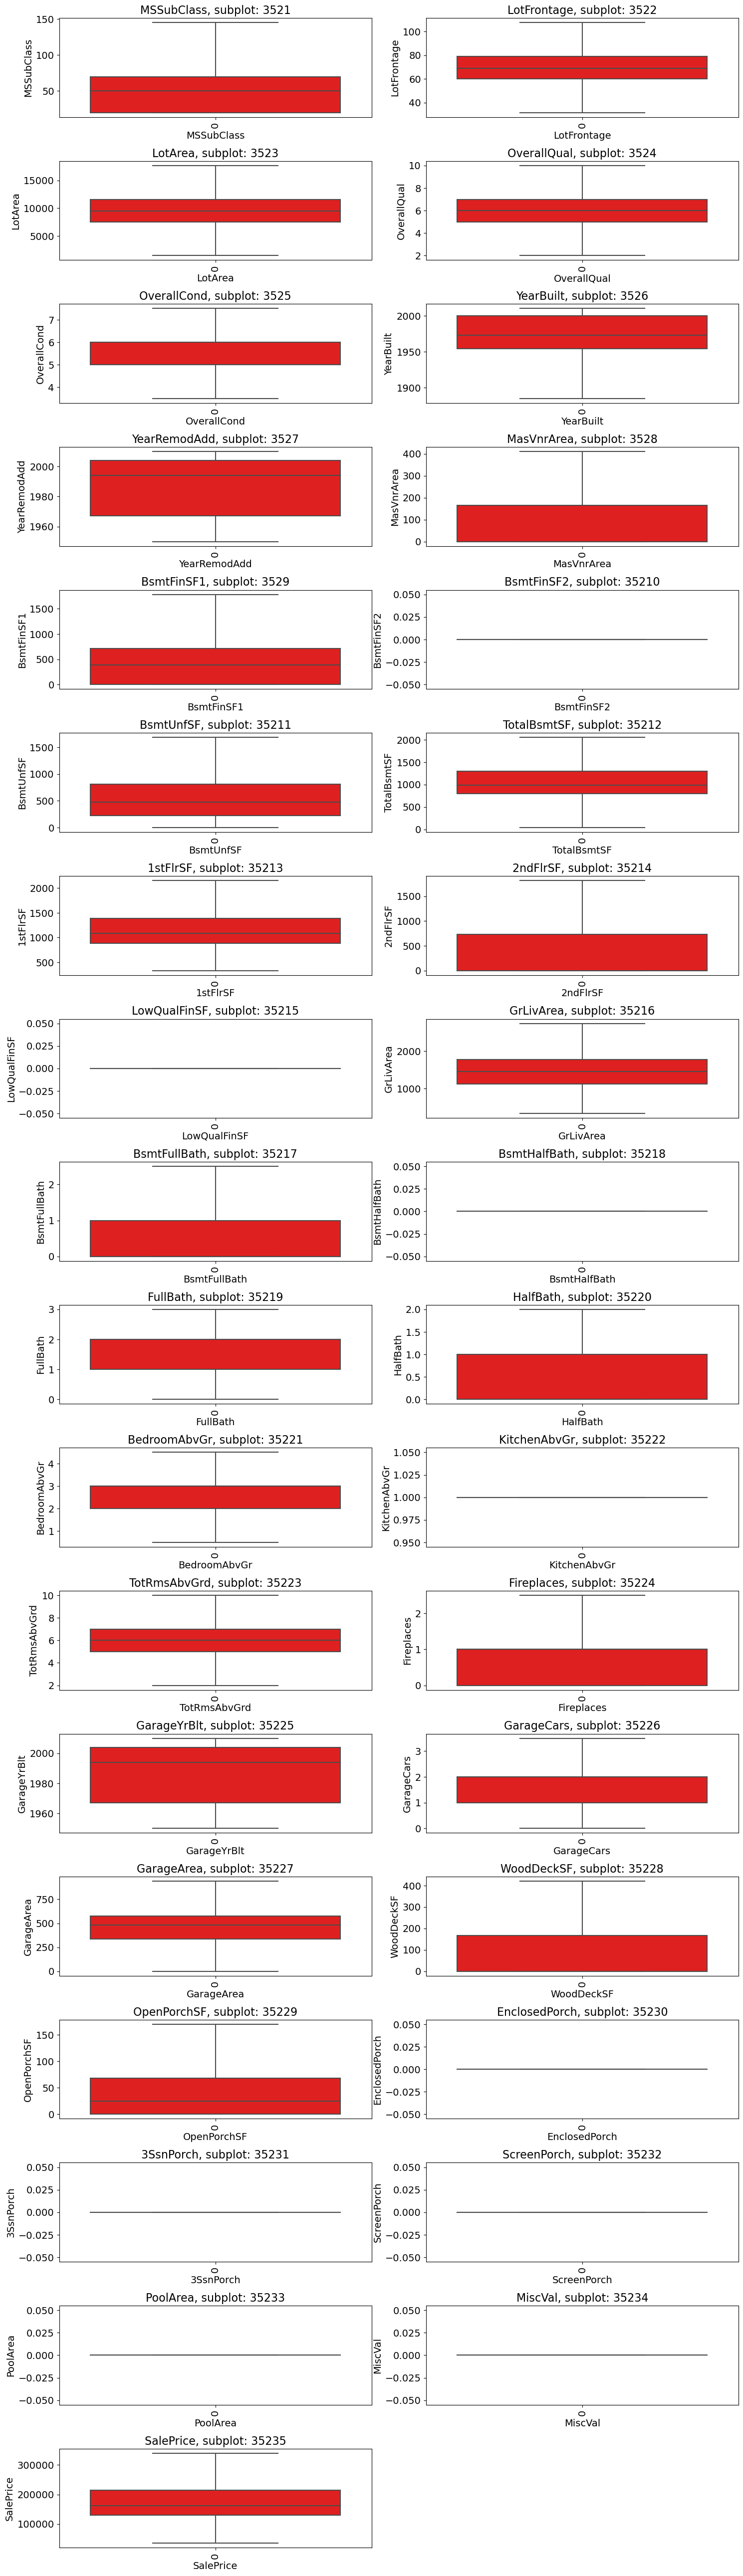

In [2989]:
# After fixing the outliers in numerical data
plot_to_view_outlier(len(numerical_columns), 2, numerical_columns, house_sale[numerical_columns], r_len=15, c_len=100)

In [2990]:
house_sale.std()

MSSubClass          37.508183
LotFrontage         17.231909
LotArea           3594.356399
OverallQual          1.378430
OverallCond          0.963696
YearBuilt           30.108397
YearRemodAdd        20.645407
MasVnrArea         134.017553
BsmtFinSF1         433.219435
BsmtFinSF2           0.000000
BsmtUnfSF          431.710214
TotalBsmtSF        397.937878
1stFlrSF           362.583002
2ndFlrSF           435.791621
LowQualFinSF         0.000000
GrLivArea          481.375641
BsmtFullBath         0.517373
BsmtHalfBath         0.000000
FullBath             0.550916
HalfBath             0.502885
BedroomAbvGr         0.759516
KitchenAbvGr         0.000000
TotRmsAbvGrd         1.541916
Fireplaces           0.638959
GarageYrBlt         20.645407
GarageCars           0.742753
GarageArea         207.105729
WoodDeckSF         116.658120
OpenPorchSF         52.501584
EnclosedPorch        0.000000
3SsnPorch            0.000000
ScreenPorch          0.000000
PoolArea             0.000000
MiscVal   

In [2991]:
# After fixing the outliers in numerical data
# From the above plots and the standard deviation, The columns that are having low variability with predicting
# <= 0.5 as std threshold / close to zero
# 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch',
# 'ScreenPorch', 'PoolArea','MiscVal'
# Dropping the columns
lv_columns = ['BsmtFinSF2', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'EnclosedPorch',
              '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']
house_sale.drop(lv_columns, axis=1, inplace=True)

In [2992]:
updated_numerical_categorical_columns()

Numberical columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')
Categorical columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleConditi

In [2993]:
house_sale.shape

(1460, 63)

## Univariate Analysis <a class="anchor" id="uv_analysis"></a>

#### Numerical Variables

In [2994]:
def distplot_for_univariate(nrow, ncol, data, dataframe, r_len=15, c_len=35):
    # Number of rows in the Subplot
    a = nrow
    # Number of columns in the Subplot
    b = ncol
    # Index to be printed on Subplot
    c = 1
    fig = plt.figure(figsize=(30,40))
    fig.set_size_inches(r_len, c_len)

    for i in data:
        plt.subplot(a,b,c)
        plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=16)
        plt.xlabel(i,fontsize=14)
        plt.ylabel(i,fontsize=14)
        plt.xticks(fontsize=10,rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=14)
        sns.distplot(dataframe[i],color = 'r') #check the estimator 'mean' here by default
        c = c+1

    plt.tight_layout()
    plt.show();

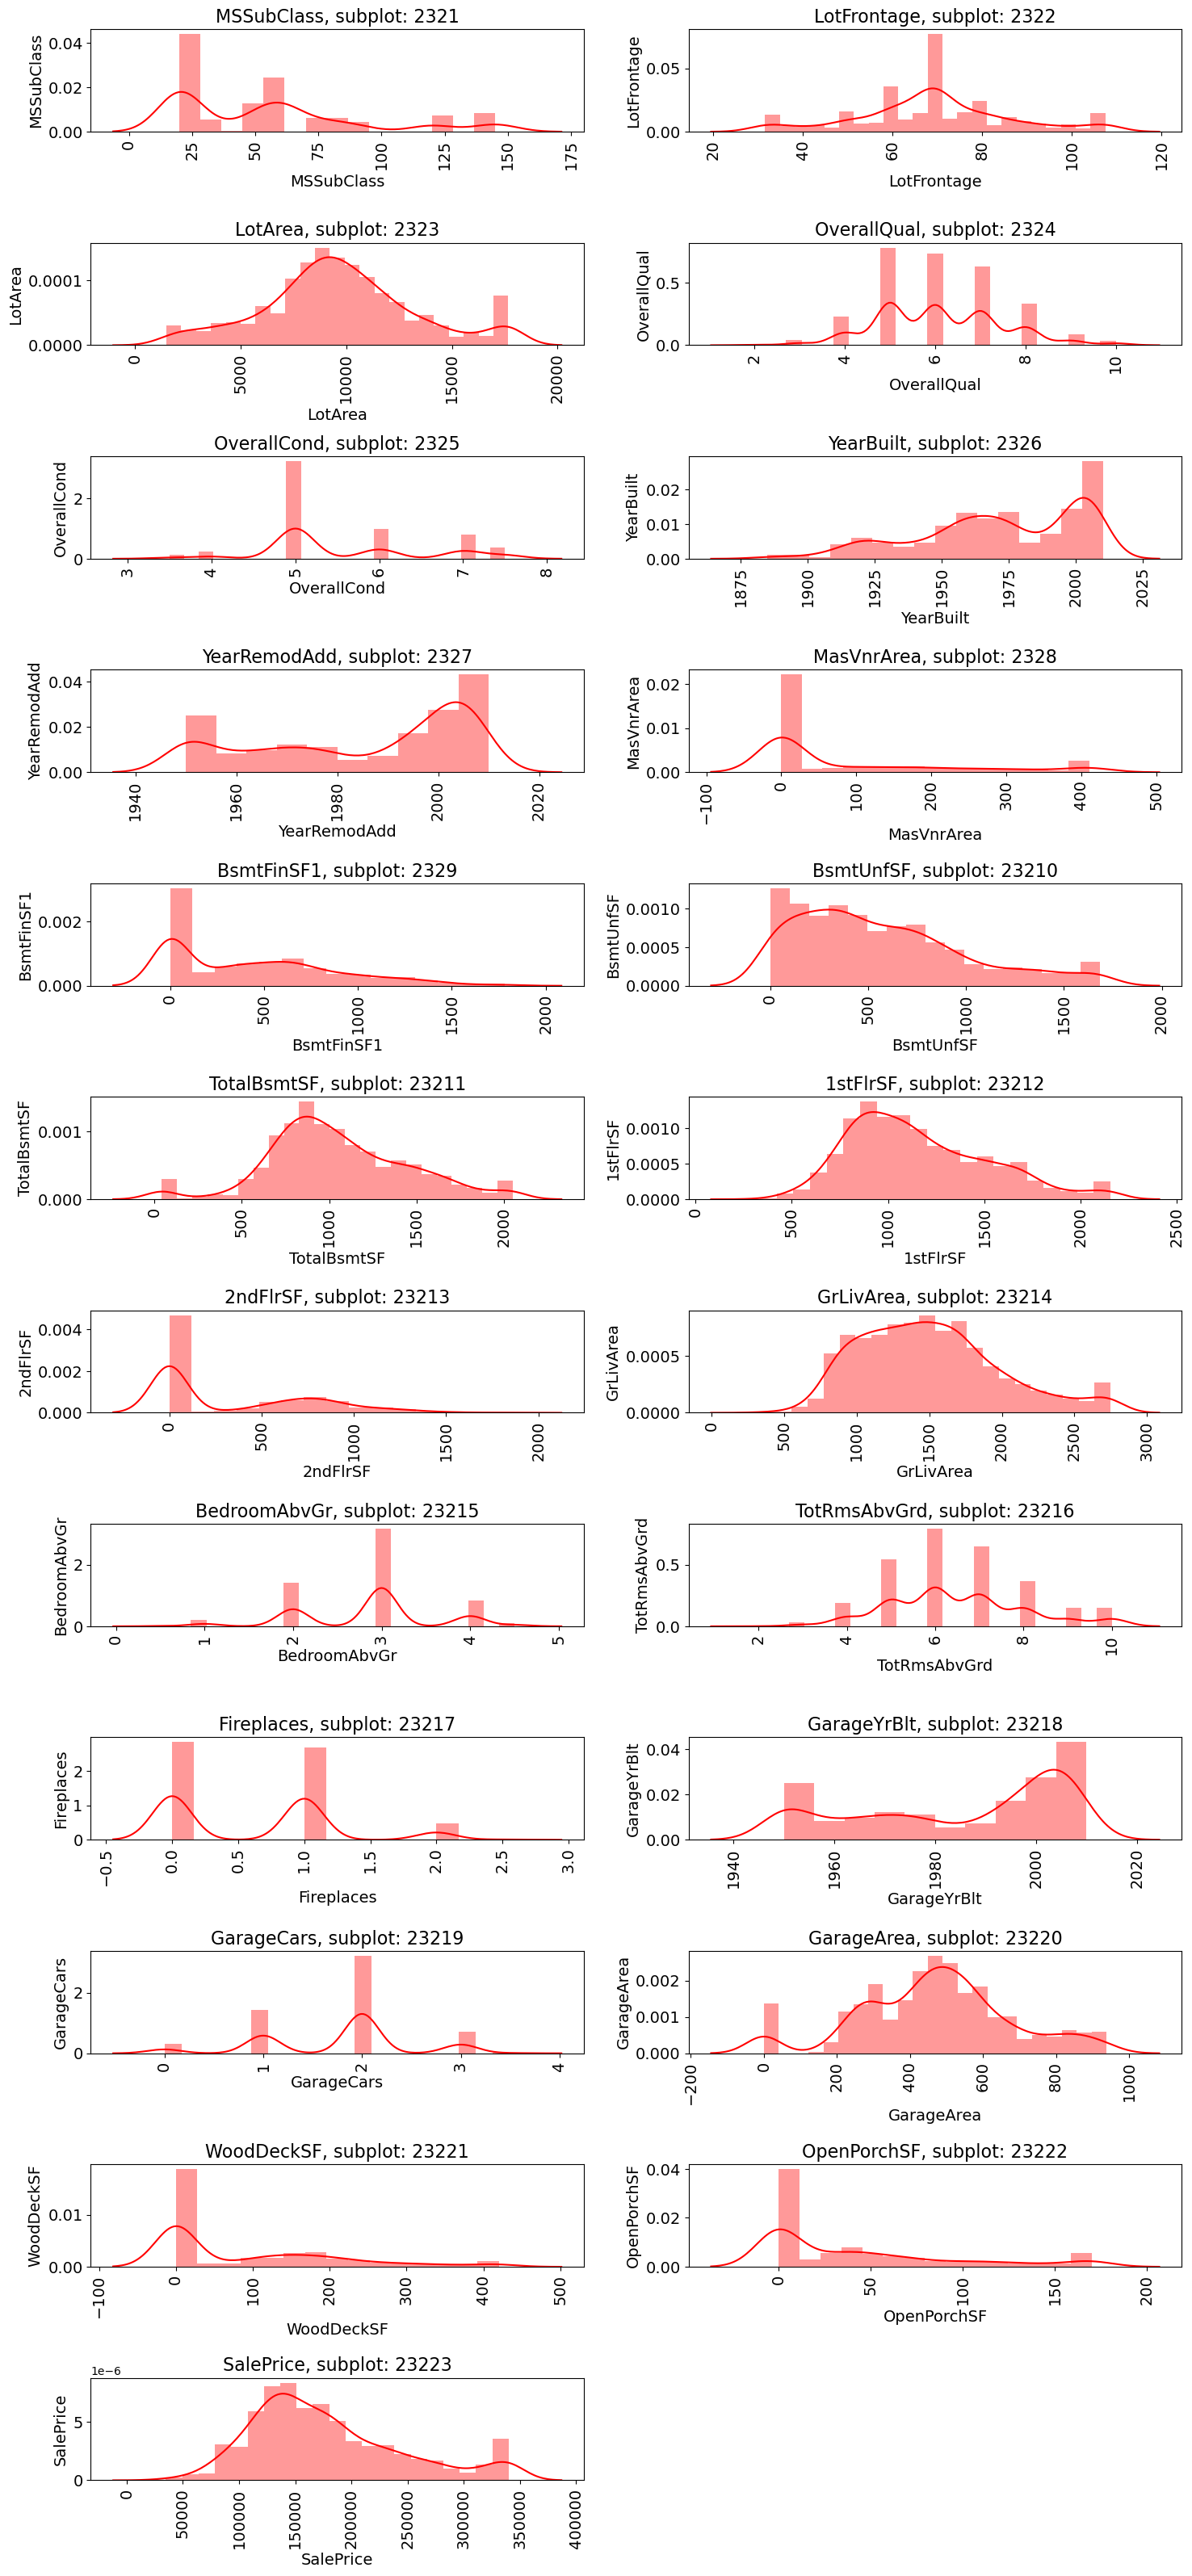

In [2995]:
distplot_for_univariate(len(numerical_columns), 2, numerical_columns, house_sale[numerical_columns], r_len=15, c_len=60)

In [2996]:
highly_skewed_columns = []
for column in numerical_columns:
    skewed = house_sale[column].skew()
    if skewed <= -1 or skewed >= 1:
        highly_skewed_columns.append(column)
    if skewed <= -1:
        print(Fore.BLUE +'Highly Left Skewed', Fore.BLACK, column, house_sale[column].skew())
    elif skewed >= 1:
        print(Fore.BLUE + 'Highly Right Skewed', Fore.BLACK, column, house_sale[column].skew())        

Highly Right Skewed  MSSubClass 1.0196241951959921
Highly Right Skewed  MasVnrArea 1.2877590043540148
Highly Right Skewed  WoodDeckSF 1.0836730926474039
Highly Right Skewed  OpenPorchSF 1.1363011278690092


In [2997]:
for column in highly_skewed_columns:
    # Log transformation those columns
    house_sale[f'log_{column}'] = np.log1p(house_sale[column])

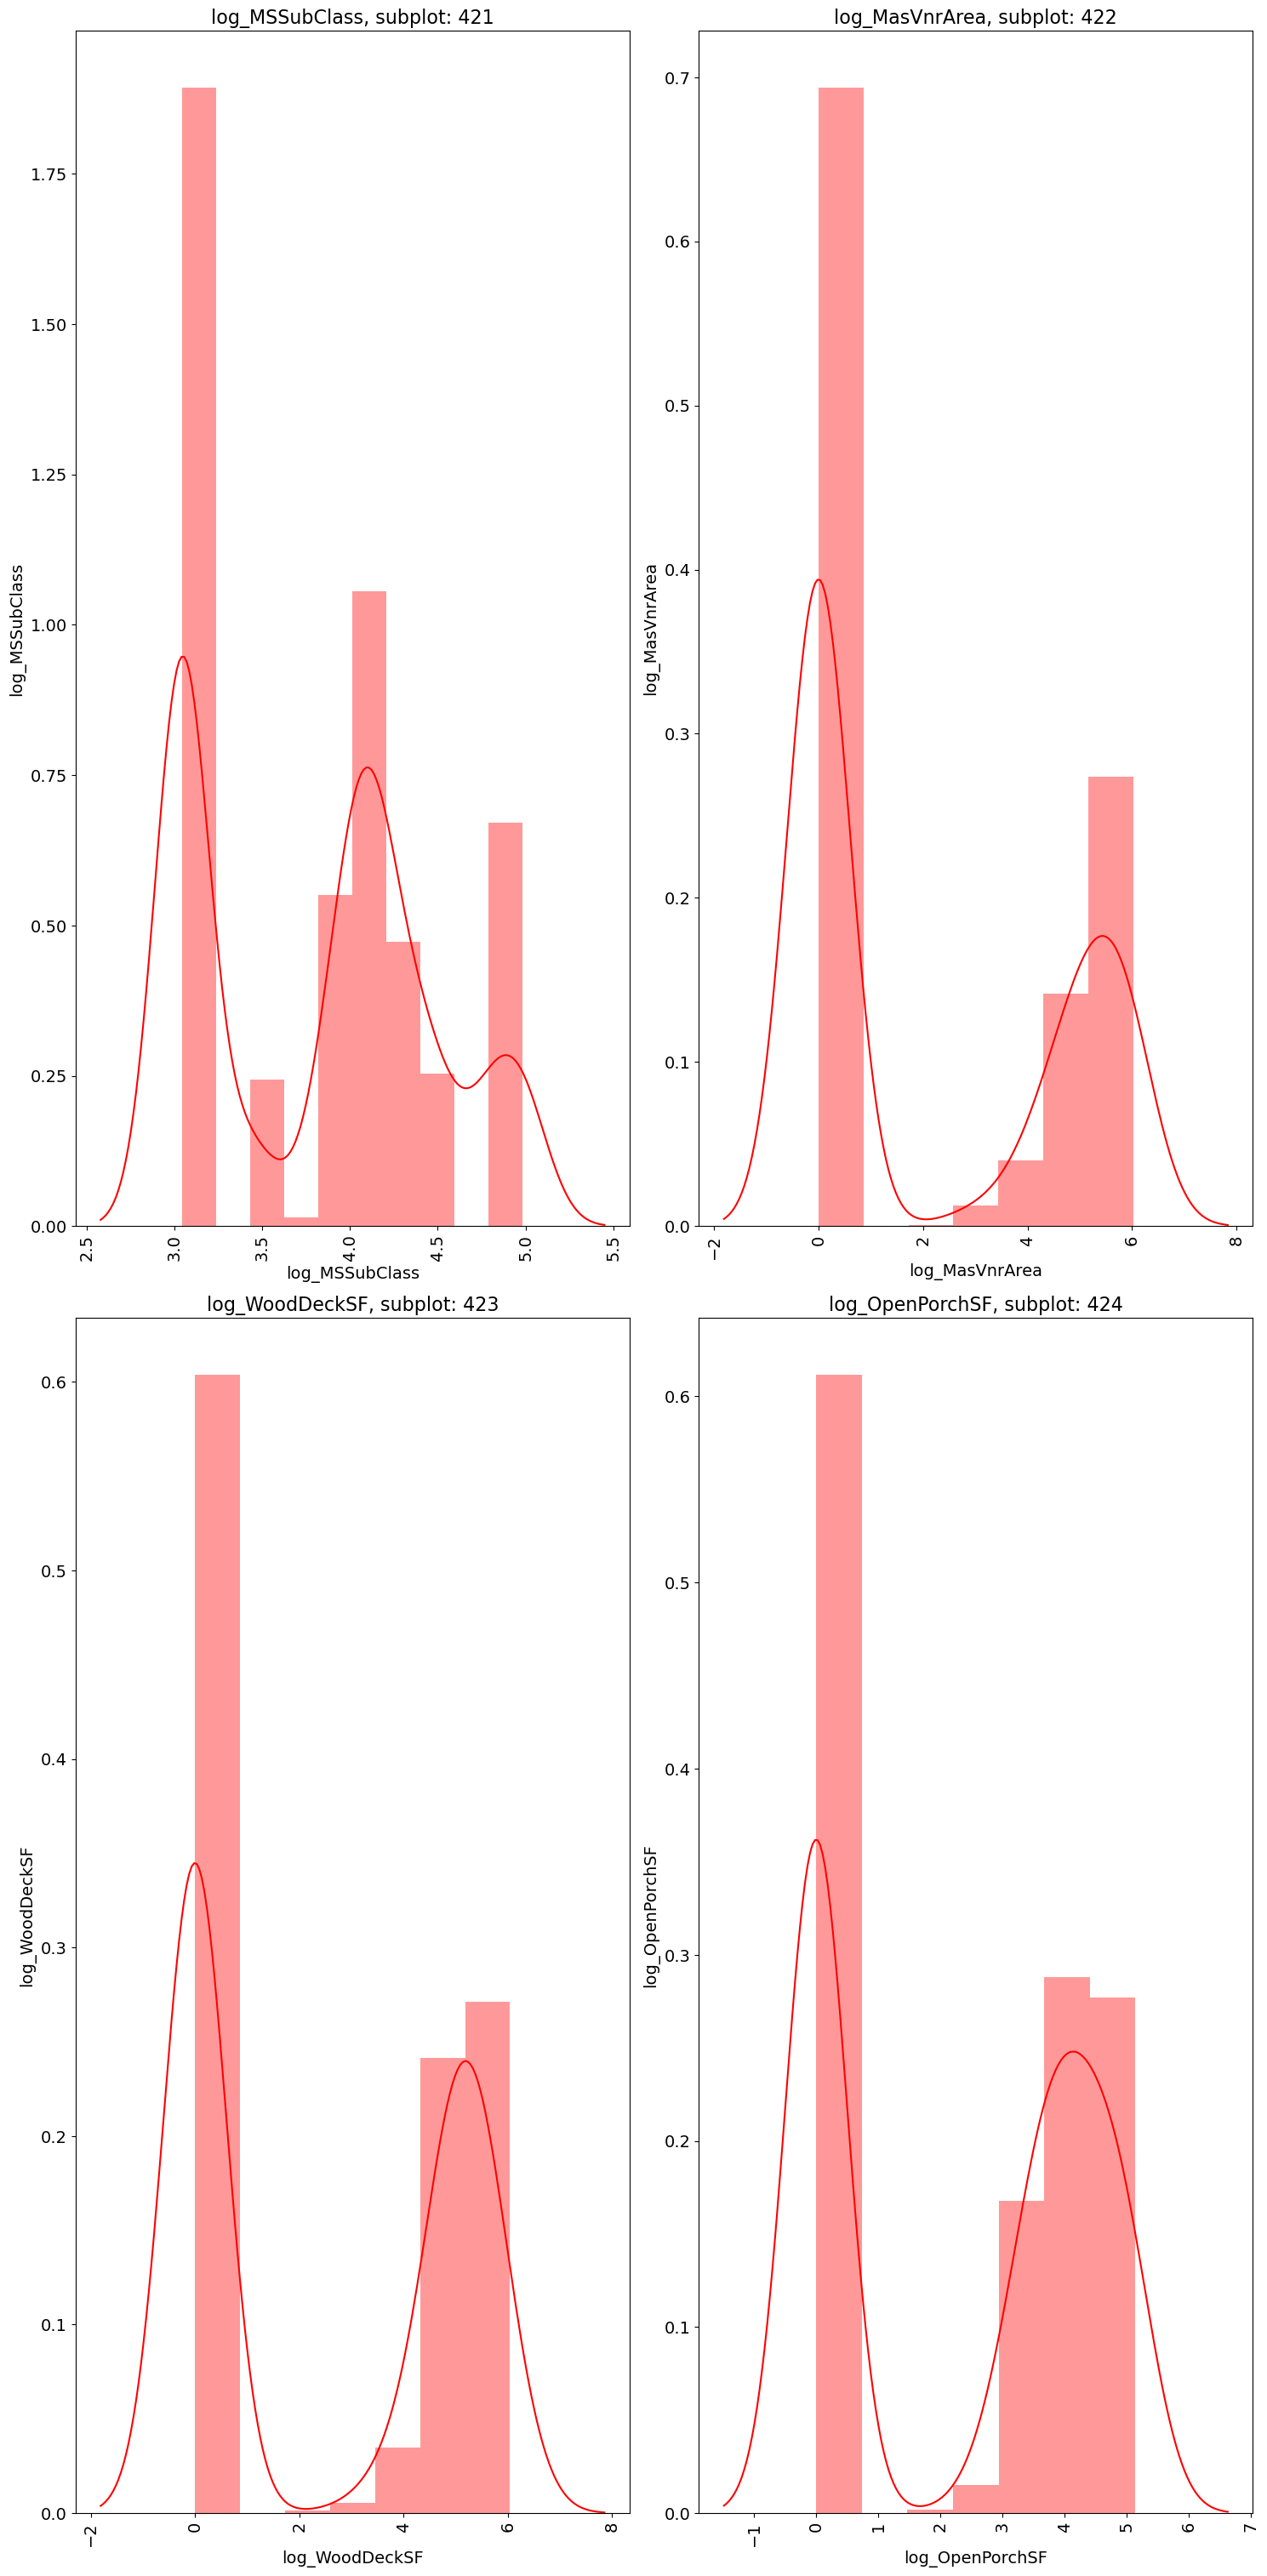

In [2998]:
logtransform_skewed_columns = [f'log_{column}' for column in highly_skewed_columns]
distplot_for_univariate(len(logtransform_skewed_columns), 2, logtransform_skewed_columns, house_sale[logtransform_skewed_columns], r_len=15, c_len=60)

In [2999]:
for column in logtransform_skewed_columns:
    print(column, house_sale[column].skew())

log_MSSubClass 0.14208814416611032
log_MasVnrArea 0.4809807812594429
log_WoodDeckSF 0.14857048073955595
log_OpenPorchSF -0.05258547294627812


After transformation Skewness is reduced in 'log_MSSubClass', 'log_MasVnrArea', 'log_WoodDeckSF', 'log_OpenPorchSF',
so no need to remove the columns from prediction

In [3000]:
#'MSSubClass', 'MasVnrArea', 'WoodDeckSF', 'OpenPorchSF'
updated_numerical_categorical_columns()

Numberical columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'log_MSSubClass',
       'log_MasVnrArea', 'log_WoodDeckSF', 'log_OpenPorchSF'],
      dtype='object')
Categorical columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual',

In [3001]:
house_sale['Year_built_vs_sold'] = house_sale['YrSold'].astype(int) - house_sale['YearBuilt'].astype(int)

In [3002]:
house_sale['Year_built_vs_sold'].nunique

<bound method IndexOpsMixin.nunique of 0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: Year_built_vs_sold, Length: 1460, dtype: int32>

#### Categorical Variables

In [3003]:
def plot_countplot_categorical_var(category_columns, df):
    a = len(categorical_columns) #Rows
    b = 3 # Columns
    c = 1 # Index
    fig = plt.figure(figsize=(30,40))
    fig.set_size_inches(20, 240)

    for i in categorical_columns:
        plt.subplot(a,b,c)
        plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=16)
        plt.xlabel(i,fontsize=14)
        plt.xticks(fontsize=10,rotation=90)
        plt.ylabel('Count',fontsize=14)
        sns.countplot(x=i, data=df, order=df[i].value_counts().index, palette='viridis')
        c = c+1

    plt.tight_layout()
    plt.show();

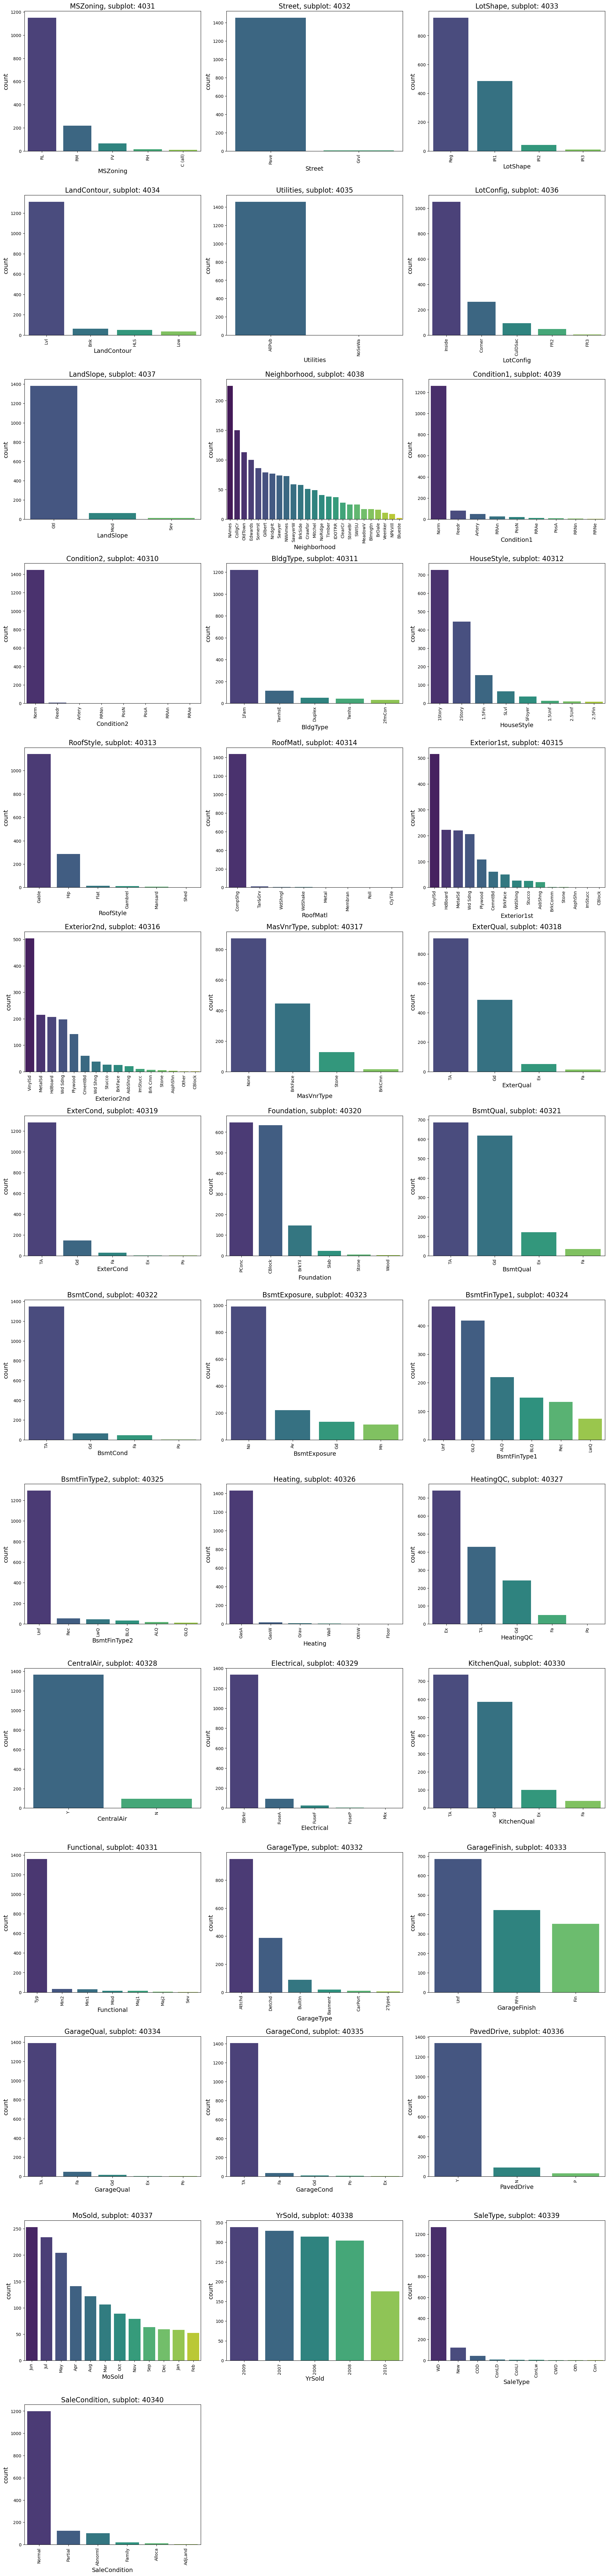

In [3004]:
plot_countplot_categorical_var(categorical_columns, house_sale)

#### <font color="brown">Understanding from Categorical column:</font>  <a class="anchor" id="source_understanding"></a>
Based on the above figures below are Single Dominant Category in below categorical columns
- 'MSZoning' (RL), 'Street' (Pave), 'LandContour' (Lvl), 'Utilities' (AllPub), 'LandSlope' (Gtl),
- 'Condition1' (Norm), 'Condition2' (Norm), 'BldgType' (1Fam), 'RoofMatl' (Compshg), 'ExterCond' (TA),
- 'BsmtCond' (TA),  'BsmtFinType2' (Unf), 'Heating' (GasA), CentralAir (Y), Electrical (SBrkr),
- 'Functional' (Typ), 'GarageQual' (TA), 'GarageCond' (TA), 'PavedDrive' (Y), 'SaleType' (WD), 'SaleCondition' (Normal)

In [3005]:
single_dominant_category = [ 'MSZoning', 'Street', 'LandContour', 'Utilities' , 'LandSlope',
'Condition1' , 'Condition2', 'BldgType' , 'RoofMatl','ExterCond', 'BsmtCond' , 'BsmtFinType2',
'Heating', 'CentralAir' , 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive',
'SaleType' ,'SaleCondition' ]

In [3006]:
house_sale.drop(single_dominant_category, axis=1, inplace=True)

In [3007]:
updated_numerical_categorical_columns()

Numberical columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'log_MSSubClass',
       'log_MasVnrArea', 'log_WoodDeckSF', 'log_OpenPorchSF', 'Year_built_vs_sold'],
      dtype='object')
Categorical columns: Index(['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'MoSold',
       'YrSold'],
      dtype='object')


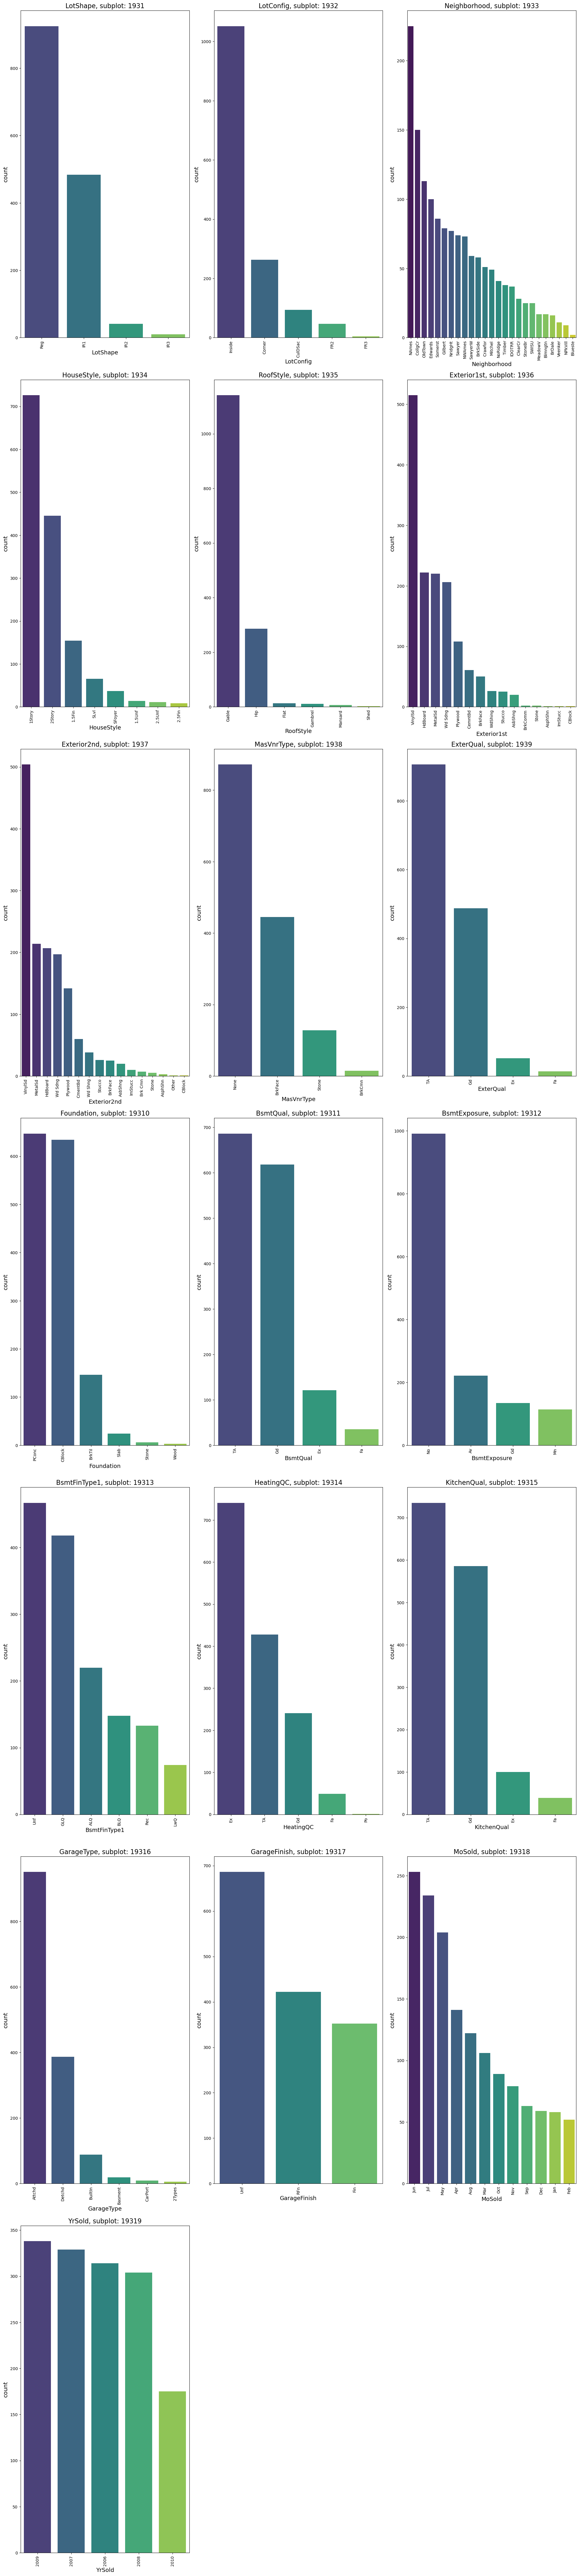

In [3008]:
plot_countplot_categorical_var(categorical_columns, house_sale)

In [3009]:
house_sale.shape

(1460, 47)

### Bivariate Analysis <a class="anchor" id="bv_analysis"></a>

#### Numerical Data

In [3010]:
# Correlation matrix
house_sale[numerical_columns].corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
MSSubClass            1.000000    -0.399010 -0.403395     0.062802    -0.085384   0.055790   
LotFrontage          -0.399010     1.000000  0.579385     0.244267    -0.063581   0.140115   
LotArea              -0.403395     0.579385  1.000000     0.221597    -0.026494   0.065765   
OverallQual           0.062802     0.244267  0.221597     1.000000    -0.134096   0.575160   
OverallCond          -0.085384    -0.063581 -0.026494    -0.134096     1.000000  -0.399685   
YearBuilt             0.055790     0.140115  0.065765     0.575160    -0.399685   1.000000   
YearRemodAdd          0.058578     0.077565  0.054472     0.550829     0.038429   0.594909   
MasVnrArea            0.034657     0.210284  0.144086     0.414226    -0.150941   0.346081   
BsmtFinSF1           -0.076423     0.144167  0.215825     0.229728    -0.045411   0.252815   
BsmtUnfSF            -0.132790     0.149535  0.087068     0.301697    -0.148518   0.145236   
TotalBsmtSF          -0.251190     0.336444  0.361769     0.541432    -0.191827   0.410450   
1stFlrSF             -0.259517     0.392061  0.458118     0.473937    -0.156582   0.288418   
2ndFlrSF              0.330582     0.069358  0.121725     0.294860     0.007366   0.011488   
GrLivArea             0.098235     0.341141  0.433877     0.597217    -0.114282   0.214627   
BedroomAbvGr         -0.050319     0.283765  0.304671     0.116727     0.005306  -0.055110   
TotRmsAbvGrd          0.044963     0.337543  0.395016     0.435768    -0.081397   0.106356   
Fireplaces           -0.029426     0.225130  0.352550     0.397375    -0.037364   0.148134   
GarageYrBlt           0.058578     0.077565  0.054472     0.550829     0.038429   0.594909   
GarageCars           -0.017853     0.310620  0.309773     0.605169    -0.216744   0.543050   
GarageArea           -0.085825     0.345119  0.344650     0.568181    -0.177911   0.487439   
WoodDeckSF           -0.009879     0.102325  0.198311     0.246423    -0.011283   0.238377   
OpenPorchSF           0.001883     0.147060  0.162026     0.358426    -0.082415   0.262130   
SalePrice            -0.061456     0.375850  0.435876     0.817680    -0.105920   0.570327   
log_MSSubClass        0.955980    -0.332905 -0.321561     0.089236    -0.059374   0.005358   
log_MasVnrArea        0.040105     0.181852  0.109660     0.404135    -0.169295   0.407578   
log_WoodDeckSF        0.035835     0.066961  0.137495     0.283145    -0.049974   0.308447   
log_OpenPorchSF       0.012444     0.144520  0.158426     0.447503    -0.134055   0.396407   
Year_built_vs_sold   -0.056637    -0.139612 -0.067285    -0.575467     0.401096  -0.999030   

                    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
MSSubClass              0.058578    0.034657   -0.076423  -0.132790    -0.251190 -0.259517   
LotFrontage             0.077565    0.210284    0.144167   0.149535     0.336444  0.392061   
LotArea                 0.054472    0.144086    0.215825   0.087068     0.361769  0.458118   
OverallQual             0.550829    0.414226    0.229728   0.301697     0.541432  0.473937   
OverallCond             0.038429   -0.150941   -0.045411  -0.148518    -0.191827 -0.156582   
YearBuilt               0.594909    0.346081    0.252815   0.145236     0.410450  0.288418   
YearRemodAdd            1.000000    0.185138    0.126339   0.178277     0.301581  0.246660   
MasVnrArea              0.185138    1.000000    0.247185   0.108669     0.355451  0.336554   
BsmtFinSF1              0.126339    0.247185    1.000000  -0.524935     0.467355  0.395393   
BsmtUnfSF               0.178277    0.108669   -0.524935   1.000000     0.427672  0.317715   
TotalBsmtSF             0.301581    0.355451    0.467355   0.427672     1.000000  0.807158   
1stFlrSF                0.246660    0.336554    0.395393   0.317715     0.807158  1.000000   
2ndFlrSF                0.140013    0.143482   -0.157613   0.008717    

In [3011]:
# To orginal column and its logtransformations are having more coerralation, to avaoid multicollinerity
# droping the orignal column
house_sale.drop(highly_skewed_columns, axis=1, inplace=True)

In [3012]:
updated_numerical_categorical_columns()

Numberical columns: Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'SalePrice', 'log_MSSubClass', 'log_MasVnrArea', 'log_WoodDeckSF', 'log_OpenPorchSF',
       'Year_built_vs_sold'],
      dtype='object')
Categorical columns: Index(['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'MoSold',
       'YrSold'],
      dtype='object')


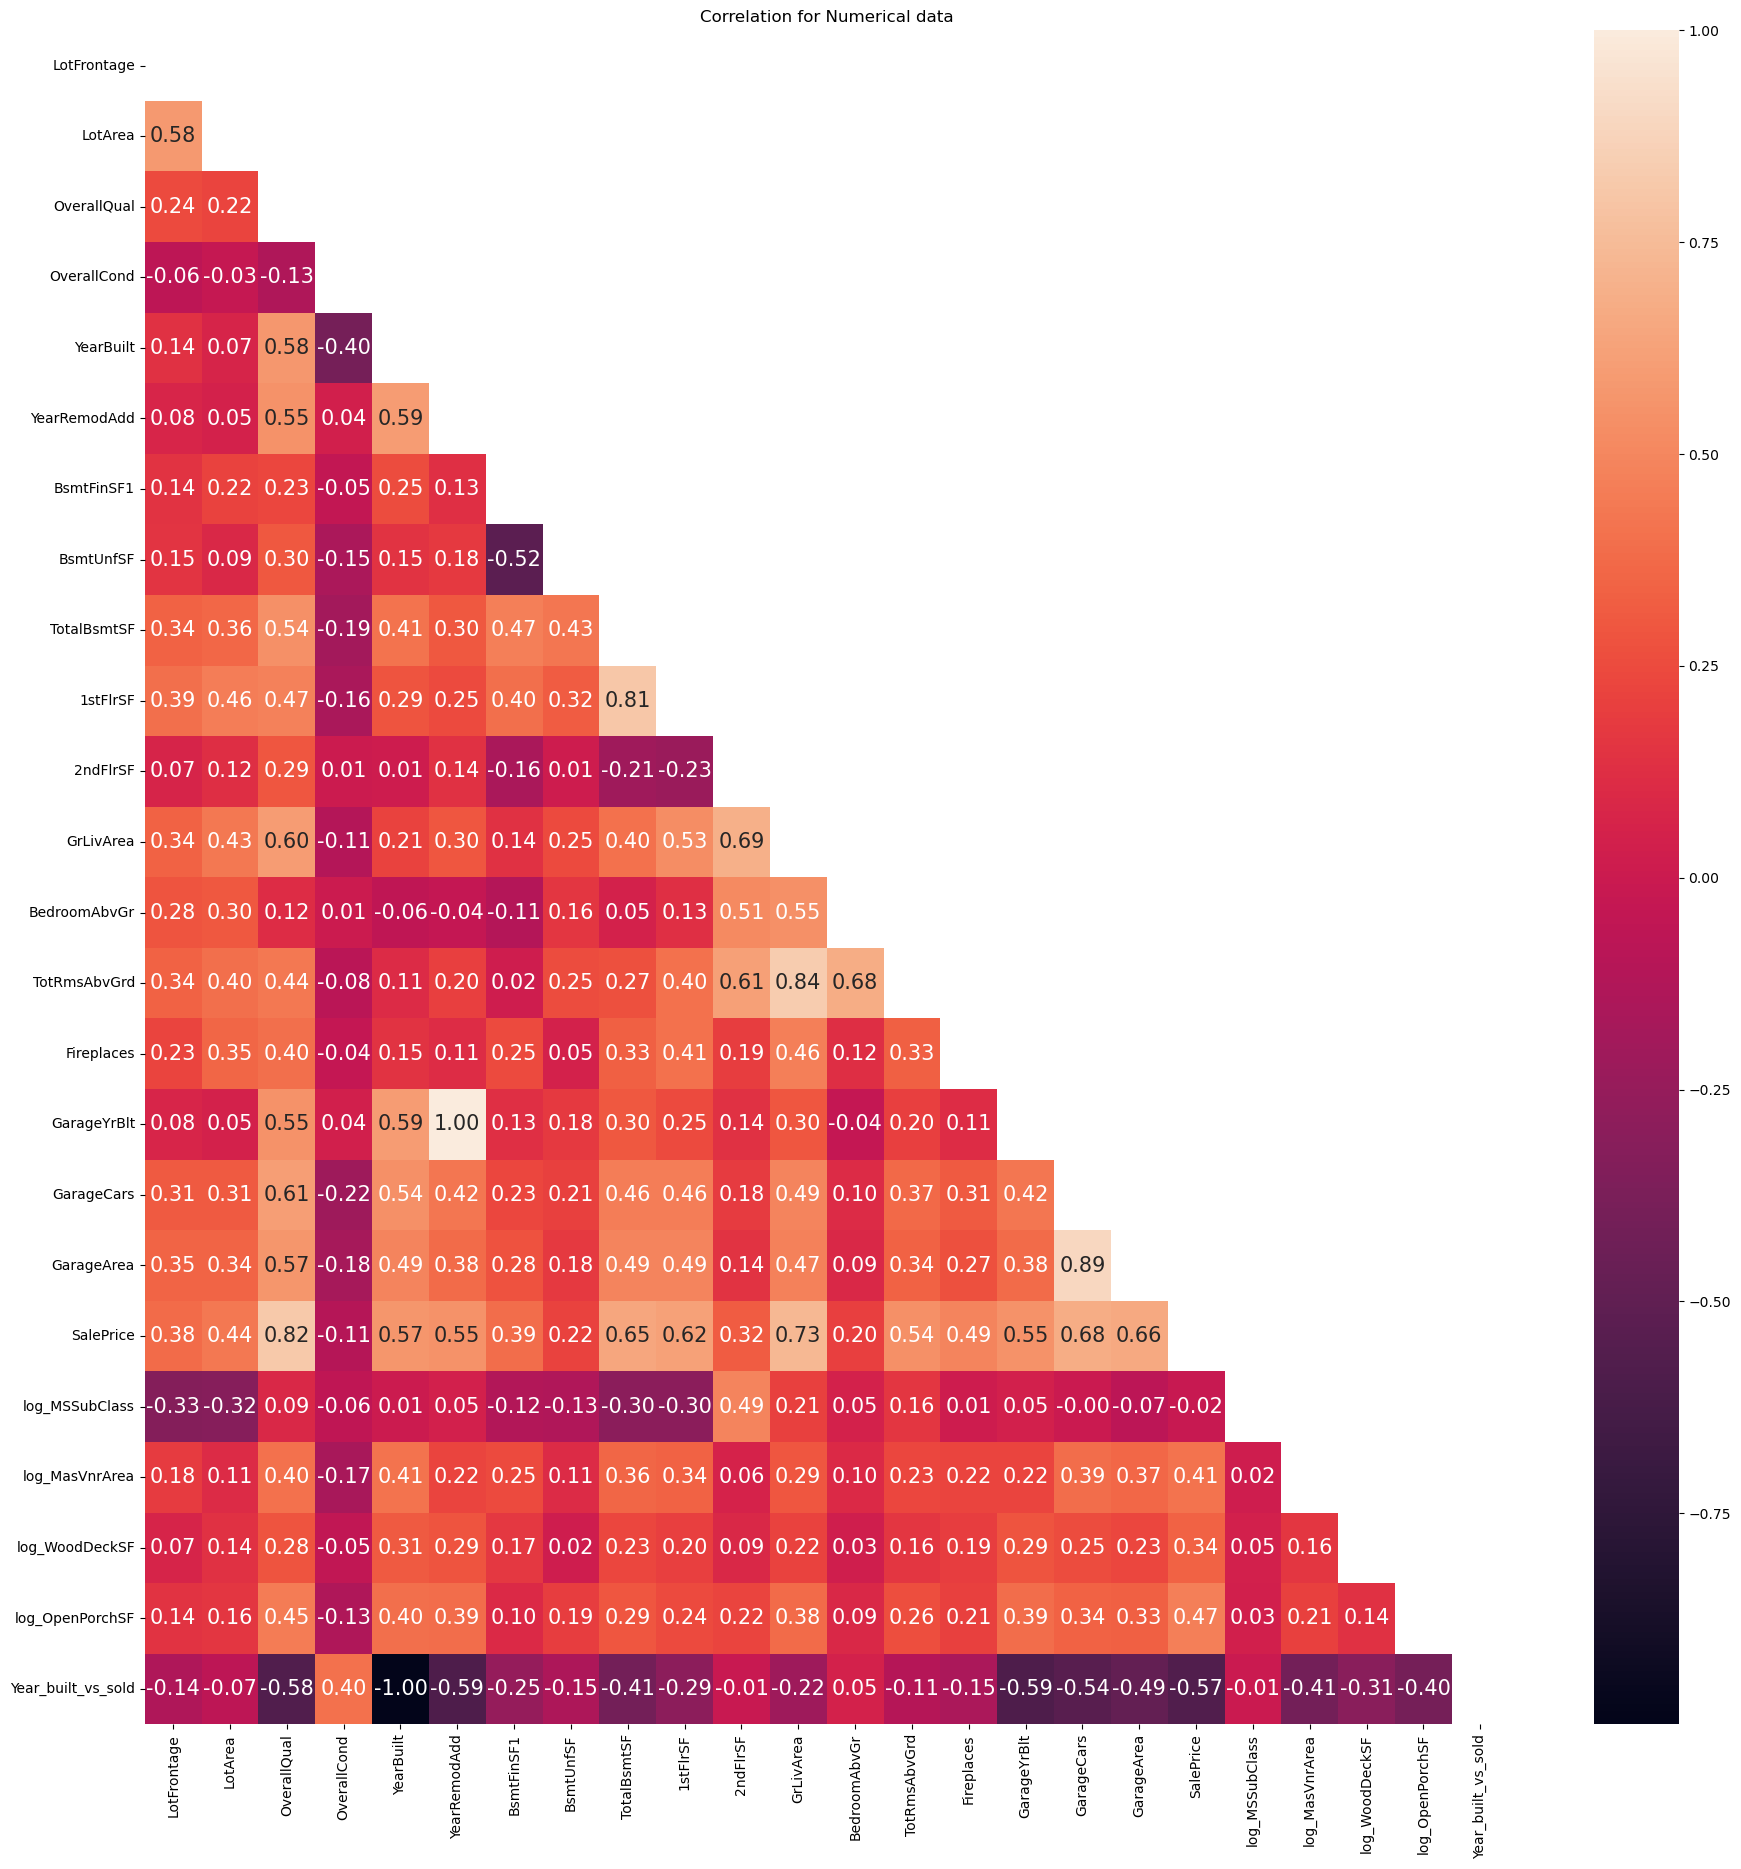

In [3013]:
# co-relation Upper Triangle matrix
correlation_matrix = house_sale[numerical_columns].corr()
correlation_uppper_matrix = np.triu(correlation_matrix)

plt.figure(figsize=(22, 22))
# Masking the upper triangle matrix and rounding off with value 2.
heat_m = sns.heatmap(correlation_matrix, mask=correlation_uppper_matrix, fmt='.2f', annot=True, annot_kws={"size": 15})
heat_m.set_title("Correlation for Numerical data")

plt.show();

#### <font color="brown"> Understanding from Correlation:</font>

- The Following columns of Numerical columns Correlation with each other are higher, so dropping one column
    - '1stFlrSF' and 'TotalBsmtSF'
    - 'TotRmsAbvGrd' and 'GrLivArea'
    - 'GarageArea' and 'GarageCars'

In [3014]:
high_corr_column = [ '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']
house_sale.drop(high_corr_column, axis=1, inplace=True)

In [3015]:
updated_numerical_categorical_columns()

Numberical columns: Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'SalePrice', 'log_MSSubClass', 'log_MasVnrArea',
       'log_WoodDeckSF', 'log_OpenPorchSF', 'Year_built_vs_sold'],
      dtype='object')
Categorical columns: Index(['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'MoSold',
       'YrSold'],
      dtype='object')


In [3016]:
# Correlation matrix with the target variable
correlation_matrix = house_sale[numerical_columns].corr()
correlation_with_target = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
correlation_with_target

SalePrice             1.000000
OverallQual           0.817680
GrLivArea             0.729311
GarageCars            0.675896
TotalBsmtSF           0.645251
Year_built_vs_sold    0.570820
YearBuilt             0.570327
YearRemodAdd          0.552061
GarageYrBlt           0.552061
Fireplaces            0.488253
log_OpenPorchSF       0.466298
LotArea               0.435876
log_MasVnrArea        0.413826
BsmtFinSF1            0.387586
LotFrontage           0.375850
log_WoodDeckSF        0.342246
2ndFlrSF              0.316508
BsmtUnfSF             0.216006
BedroomAbvGr          0.199360
OverallCond           0.105920
log_MSSubClass        0.020681
Name: SalePrice, dtype: float64

In [3017]:
# Compare the Year build vs year sold with saleprice coer is similar to YearBuild
# The 'GarageYrBlt' will no need the past year data to predict the model
# So we can drop Yearbuild
house_sale.drop(['YearBuilt', 'GarageYrBlt'], axis=1, inplace=True)

Based on correlation, OverallQual > GrLivArea > GarageCars > GarageArea and soon

#### Categorical Variables

In [3018]:
def plot_boxplot_categorical_var(category_column, df):
    a = len(category_column) #Rows
    b = 2 # Columns
    c = 1 # Index
    fig = plt.figure(figsize=(40,50))
    fig.set_size_inches(25, 140)

    for i in category_column:
        plt.subplot(a,b,c)
        plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=16)
        plt.xlabel(i,fontsize=20)
        plt.xticks(fontsize=10,rotation=90)
        plt.ylabel('SalePrice',fontsize=20)
        plt.tick_params(axis='x', labelsize=25)
        plt.tick_params(axis='y', labelsize=20)

        sns.boxplot(x = df[i], y = 'SalePrice',  data = df)
        c = c+1

    plt.tight_layout()
    plt.show();

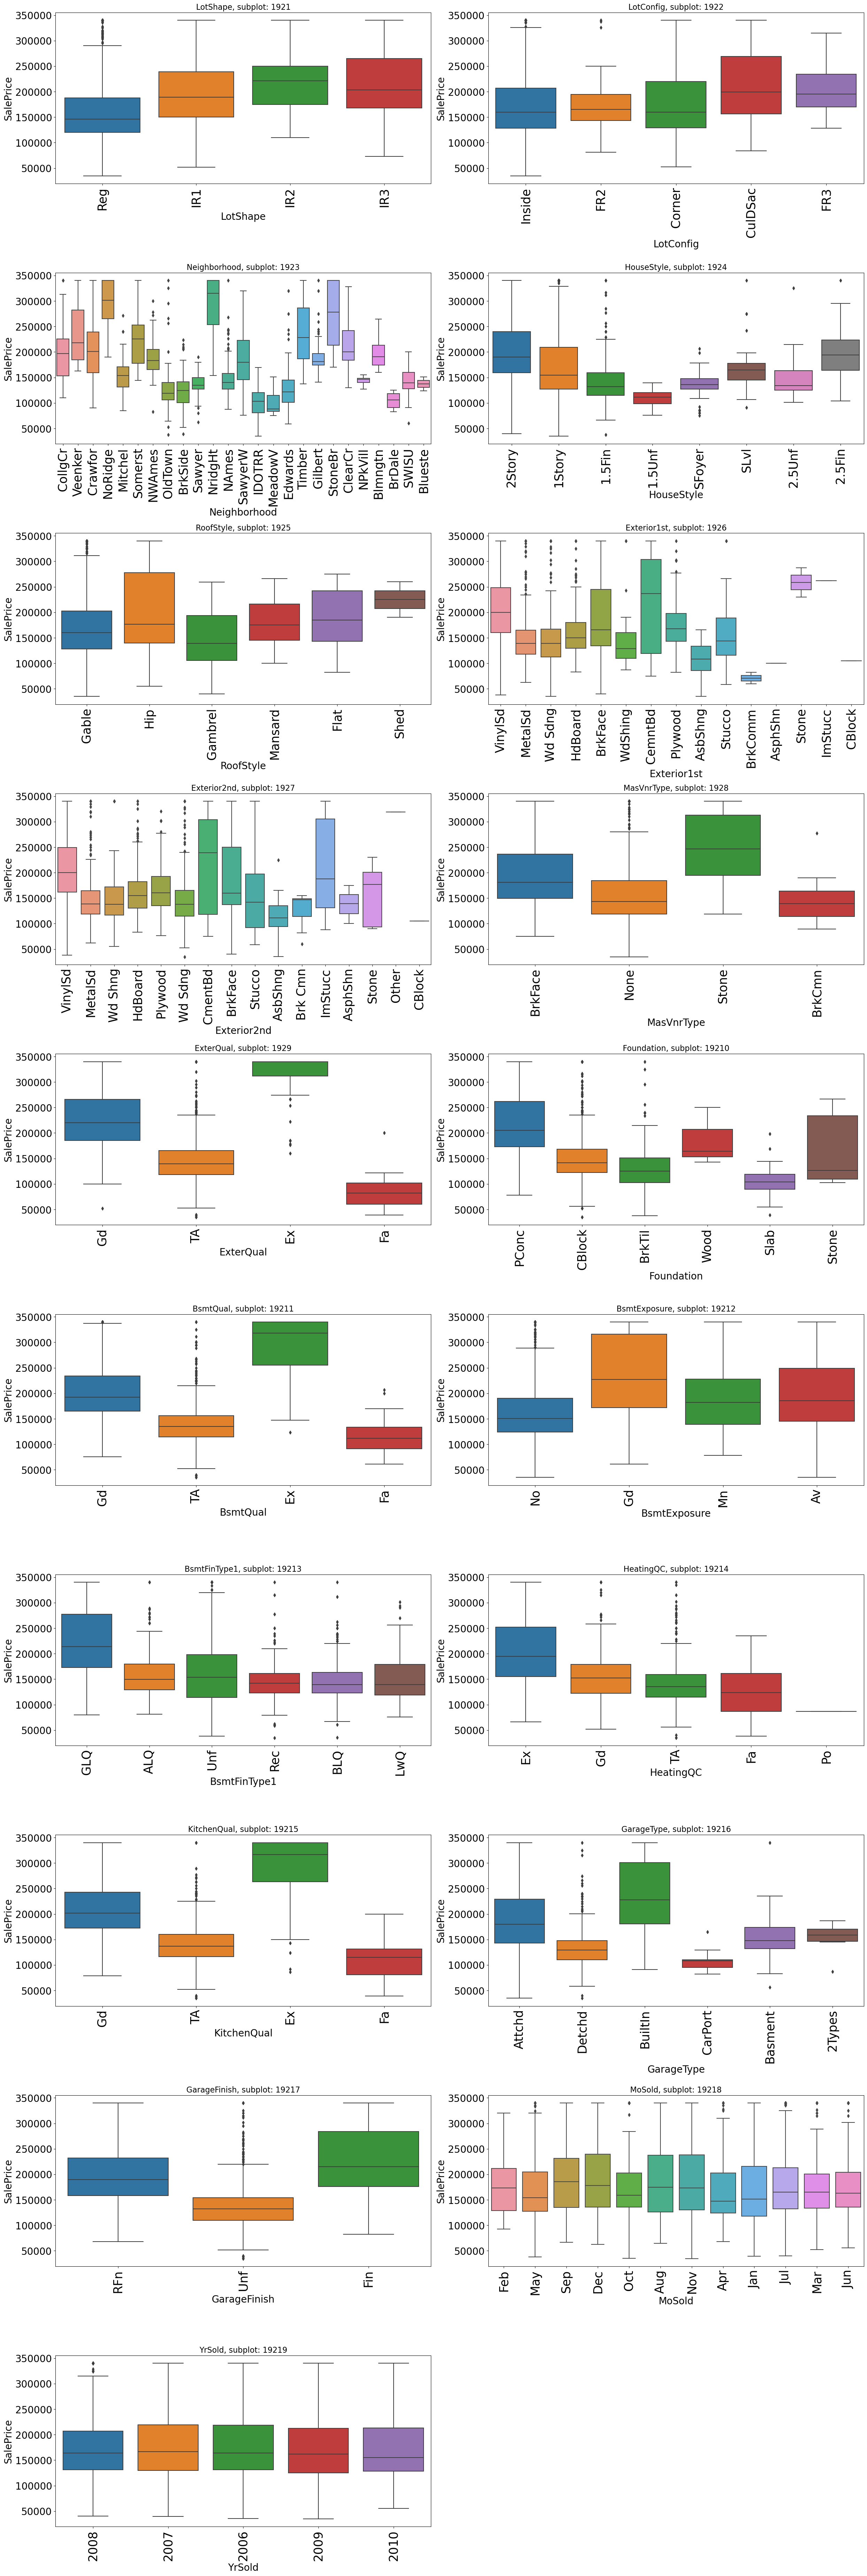

In [3019]:
plot_boxplot_categorical_var(categorical_columns, house_sale)

In [3020]:
house_sale.shape

(1460, 38)

#### <font color="brown"> Understanding from Categorical variable:</font>

- Moderately Irregular in LotShape has more saleprice
- Near by 'Northridge' and 'Northridge Heights' city has more saleprice
- Two Story Housestyle has more saleprice
- Gabel, Hip, Mansard type of roofstyle has more saleprice
- Cement Board, Stone, and Vinyl Siding exterior of house has more saleprice
- Mostly Excellent condition in other fields has more saleprice
- May, Oct, Apr has less saleprice compare to other months

In [3021]:
# Define a threshold 30% of low frequency category are grouped as others
threshold = .3
total = len(house_sale)

for each in categorical_columns:
    # Check category frequencies
    category_frequencies = house_sale[each].value_counts() / total
    
    # Identify categories with frequencies below the threshold
    low_frequency_categories = category_frequencies[category_frequencies < threshold].index

    # Consolidate low-frequency categories into 'Other'
    house_sale[each] = house_sale[each].apply(lambda x: 'Other' if x in low_frequency_categories else x)

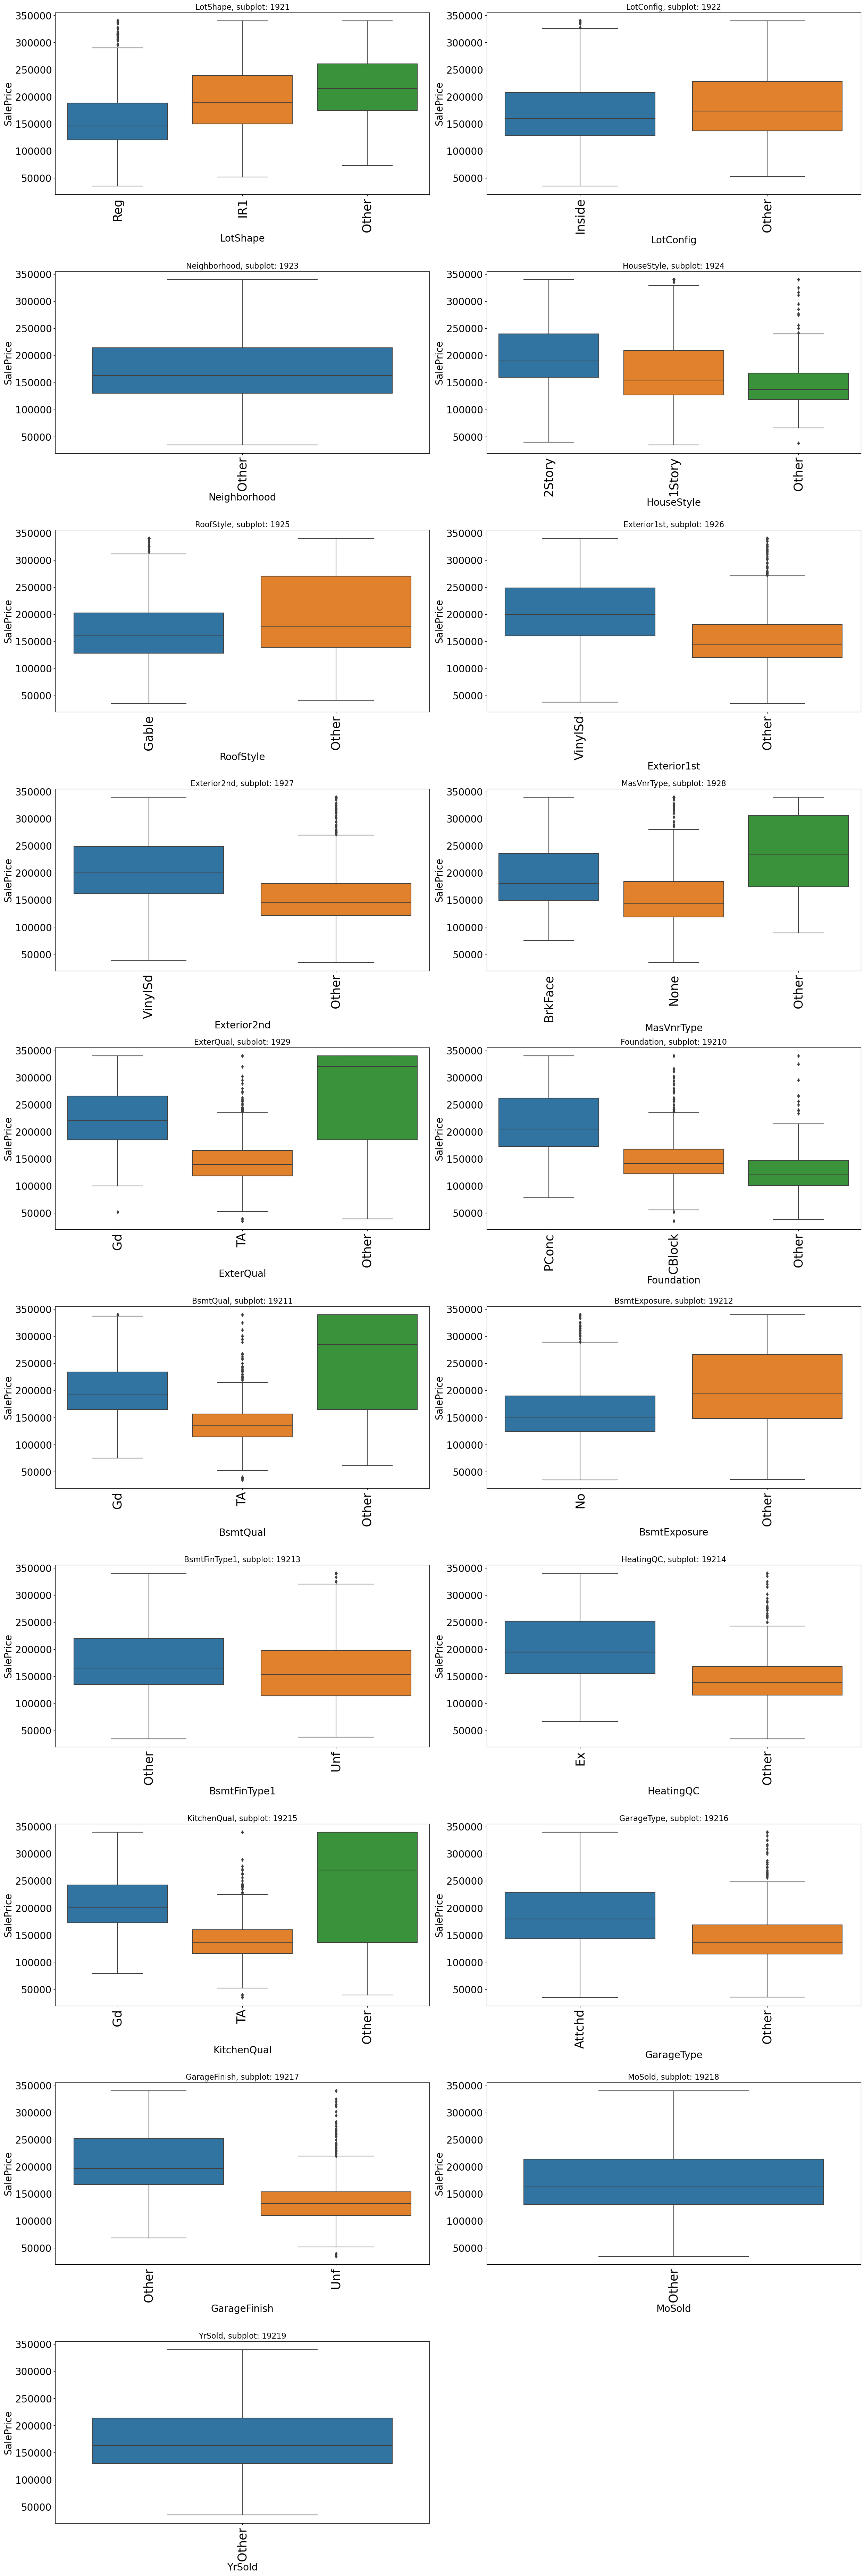

In [3022]:
plot_boxplot_categorical_var(categorical_columns, house_sale)

In [3023]:
updated_numerical_categorical_columns()

Numberical columns: Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'SalePrice', 'log_MSSubClass', 'log_MasVnrArea', 'log_WoodDeckSF',
       'log_OpenPorchSF', 'Year_built_vs_sold'],
      dtype='object')
Categorical columns: Index(['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'MoSold',
       'YrSold'],
      dtype='object')


In [3024]:
# Drop the one categories after the low frequency category
low_freq_category = [ 'Neighborhood', 'MoSold', 'YrSold' ]
house_sale.drop(low_freq_category, axis=1, inplace=True)

In [3025]:
updated_numerical_categorical_columns()

Numberical columns: Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'SalePrice', 'log_MSSubClass', 'log_MasVnrArea', 'log_WoodDeckSF',
       'log_OpenPorchSF', 'Year_built_vs_sold'],
      dtype='object')
Categorical columns: Index(['LotShape', 'LotConfig', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish'],
      dtype='object')


In [3026]:
house_sale.shape

(1460, 35)

## Step 4: Encoding <a class="anchor" id="encoding"></a>

One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.

In [3027]:
house_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LotFrontage         1460 non-null   float64
 1   LotArea             1460 non-null   float64
 2   LotShape            1460 non-null   object 
 3   LotConfig           1460 non-null   object 
 4   HouseStyle          1460 non-null   object 
 5   OverallQual         1460 non-null   float64
 6   OverallCond         1460 non-null   float64
 7   YearRemodAdd        1460 non-null   float64
 8   RoofStyle           1460 non-null   object 
 9   Exterior1st         1460 non-null   object 
 10  Exterior2nd         1460 non-null   object 
 11  MasVnrType          1460 non-null   object 
 12  ExterQual           1460 non-null   object 
 13  Foundation          1460 non-null   object 
 14  BsmtQual            1460 non-null   object 
 15  BsmtExposure        1460 non-null   object 
 16  BsmtFi

In [3028]:
updated_numerical_categorical_columns()

Numberical columns: Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'SalePrice', 'log_MSSubClass', 'log_MasVnrArea', 'log_WoodDeckSF',
       'log_OpenPorchSF', 'Year_built_vs_sold'],
      dtype='object')
Categorical columns: Index(['LotShape', 'LotConfig', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish'],
      dtype='object')


In [3029]:
house_sale[categorical_columns].head()

LotShape LotConfig HouseStyle RoofStyle Exterior1st Exterior2nd MasVnrType ExterQual Foundation  \
0      Reg    Inside     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd      PConc   
1      Reg     Other     1Story     Gable       Other       Other       None        TA     CBlock   
2      IR1    Inside     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd      PConc   
3      IR1     Other     2Story     Gable       Other       Other       None        TA      Other   
4      IR1     Other     2Story     Gable     VinylSd     VinylSd    BrkFace        Gd      PConc   

  BsmtQual BsmtExposure BsmtFinType1 HeatingQC KitchenQual GarageType GarageFinish  
0       Gd           No        Other        Ex          Gd     Attchd        Other  
1       Gd        Other        Other        Ex          TA     Attchd        Other  
2       Gd        Other        Other        Ex          Gd     Attchd        Other  
3       TA           No        Other     Other          Gd      Other          Unf  
4       Gd        Other        Other        Ex          Gd     Attchd        Other

In [3030]:
print('+---------------------------+')
print('Columns \t NUnique \t Uniques')
print('+---------------------------+')
for each in categorical_columns:
    each_column = "{0:8}".format(each)
    print(each_column, '\t', house_sale[each].nunique(), '\t', house_sale[each].unique())

+---------------------------+
Columns 	 NUnique 	 Uniques
+---------------------------+
LotShape 	 3 	 ['Reg' 'IR1' 'Other']
LotConfig 	 2 	 ['Inside' 'Other']
HouseStyle 	 3 	 ['2Story' '1Story' 'Other']
RoofStyle 	 2 	 ['Gable' 'Other']
Exterior1st 	 2 	 ['VinylSd' 'Other']
Exterior2nd 	 2 	 ['VinylSd' 'Other']
MasVnrType 	 3 	 ['BrkFace' 'None' 'Other']
ExterQual 	 3 	 ['Gd' 'TA' 'Other']
Foundation 	 3 	 ['PConc' 'CBlock' 'Other']
BsmtQual 	 3 	 ['Gd' 'TA' 'Other']
BsmtExposure 	 2 	 ['No' 'Other']
BsmtFinType1 	 2 	 ['Other' 'Unf']
HeatingQC 	 2 	 ['Ex' 'Other']
KitchenQual 	 3 	 ['Gd' 'TA' 'Other']
GarageType 	 2 	 ['Attchd' 'Other']
GarageFinish 	 2 	 ['Other' 'Unf']


In [3031]:
# Convert categorical value into Dummy variables (one hot encoding)
house_sale_dummies=pd.get_dummies(house_sale[categorical_columns],drop_first=True)
house_sale_dummies.head()

LotShape_Other  LotShape_Reg  LotConfig_Other  HouseStyle_2Story  HouseStyle_Other  \
0               0             1                0                  1                 0   
1               0             1                1                  0                 0   
2               0             0                0                  1                 0   
3               0             0                1                  1                 0   
4               0             0                1                  1                 0   

   RoofStyle_Other  Exterior1st_VinylSd  Exterior2nd_VinylSd  MasVnrType_None  MasVnrType_Other  \
0                0                    1                    1                0                 0   
1                0                    0                    0                1                 0   
2                0                    1                    1                0                 0   
3                0                    0                    0                1                 0   
4                0                    1                    1                0                 0   

   ExterQual_Other  ExterQual_TA  Foundation_Other  Foundation_PConc  BsmtQual_Other  BsmtQual_TA  \
0                0             0                 0                 1               0            0   
1                0             1                 0                 0               0            0   
2                0             0                 0                 1               0            0   
3                0             1                 1                 0               0            1   
4                0             0                 0                 1               0            0   

   BsmtExposure_Other  BsmtFinType1_Unf  HeatingQC_Other  KitchenQual_Other  KitchenQual_TA  \
0                   0                 0                0                  0               0   
1                   1                 0                0                  0               1   
2                   1                 0                0                  0               0   
3                   0                 0                1                  0               0   
4                   1                 0                0                  0               0   

   GarageType_Other  GarageFinish_Unf  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 1                 1  
4                 0                 0

In [3032]:
# Drop all the categorical columns and add those dummies
house_sale.drop(categorical_columns, axis=1, inplace=True)

In [3033]:
updated_numerical_categorical_columns()

Numberical columns: Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'SalePrice', 'log_MSSubClass', 'log_MasVnrArea', 'log_WoodDeckSF',
       'log_OpenPorchSF', 'Year_built_vs_sold'],
      dtype='object')
Categorical columns: Index([], dtype='object')


In [3034]:
# Concat the dummy variable to exising dataset
house_sale = pd.concat([house_sale, house_sale_dummies], axis = 1)
house_sale.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  BsmtFinSF1  BsmtUnfSF  \
0         65.0   8450.0          7.0          5.0        2003.0       706.0      150.0   
1         80.0   9600.0          6.0          7.5        1976.0       978.0      284.0   
2         68.0  11250.0          7.0          5.0        2002.0       486.0      434.0   
3         60.0   9550.0          7.0          5.0        1970.0       216.0      540.0   
4         84.0  14260.0          8.0          5.0        2000.0       655.0      490.0   

   TotalBsmtSF  2ndFlrSF  GrLivArea  BedroomAbvGr  Fireplaces  GarageCars  SalePrice  \
0        856.0     854.0     1710.0           3.0         0.0         2.0   208500.0   
1       1262.0       0.0     1262.0           3.0         1.0         2.0   181500.0   
2        920.0     866.0     1786.0           3.0         1.0         2.0   223500.0   
3        756.0     756.0     1717.0           3.0         1.0         3.0   140000.0   
4       1145.0    1053.0     2198.0           4.0         1.0         3.0   250000.0   

   log_MSSubClass  log_MasVnrArea  log_WoodDeckSF  log_OpenPorchSF  Year_built_vs_sold  \
0        4.110874        5.283204        0.000000         4.127134                   5   
1        3.044522        0.000000        5.700444         0.000000                  31   
2        4.110874        5.093750        0.000000         3.761200                   7   
3        4.262680        0.000000        0.000000         3.583519                  91   
4        4.110874        5.860786        5.262690         4.442651                   8   

   LotShape_Other  LotShape_Reg  LotConfig_Other  HouseStyle_2Story  HouseStyle_Other  \
0               0             1                0                  1                 0   
1               0             1                1                  0                 0   
2               0             0                0                  1                 0   
3               0             0                1                  1                 0   
4               0             0                1                  1                 0   

   RoofStyle_Other  Exterior1st_VinylSd  Exterior2nd_VinylSd  MasVnrType_None  MasVnrType_Other  \
0                0                    1                    1                0                 0   
1                0                    0                    0                1                 0   
2                0                    1                    1                0                 0   
3                0                    0                    0                1                 0   
4                0                    1                    1                0                 0   

   ExterQual_Other  ExterQual_TA  Foundation_Other  Foundation_PConc  BsmtQual_Other  BsmtQual_TA  \
0                0             0                 0                 1               0            0   
1                0             1                 0                 0               0            0   
2                0             0                 0                 1               0            0   
3                0             1                 1                 0               0            1   
4                0             0                 0                 1               0            0   

   BsmtExposure_Other  BsmtFinType1_Unf  HeatingQC_Other  KitchenQual_Other  KitchenQual_TA  \
0                   0                 0                0                  0               0   
1                   1                 0                0                  0               1   
2                   1                 0                0                  0               0   
3                   0                 0                1                  0               0   
4                   1                 0                0                  0               0   

   GarageType_Other  GarageFinish_Unf  
0                 0                 0  
1   

In [3035]:
house_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LotFrontage          1460 non-null   float64
 1   LotArea              1460 non-null   float64
 2   OverallQual          1460 non-null   float64
 3   OverallCond          1460 non-null   float64
 4   YearRemodAdd         1460 non-null   float64
 5   BsmtFinSF1           1460 non-null   float64
 6   BsmtUnfSF            1460 non-null   float64
 7   TotalBsmtSF          1460 non-null   float64
 8   2ndFlrSF             1460 non-null   float64
 9   GrLivArea            1460 non-null   float64
 10  BedroomAbvGr         1460 non-null   float64
 11  Fireplaces           1460 non-null   float64
 12  GarageCars           1460 non-null   float64
 13  SalePrice            1460 non-null   float64
 14  log_MSSubClass       1460 non-null   float64
 15  log_MasVnrArea       1460 non-null   f

In [3036]:
house_sale.shape

(1460, 42)

## Step 5: Train Test Split <a class="anchor" id="test_split"></a>

In [3037]:
# Seperate independent and depedent varaible
# 'SalePrice' is dependent variable so drop it .
X = house_sale.drop('SalePrice', axis=1)

# Copying the 'SalePrice' column alone into the y dataframe.
y = house_sale[['SalePrice']]

In [3038]:
for column in X.columns:
    skewed = X[column].skew()
    if skewed <= -1:
        print(Fore.BLUE +'Highly Left Skewed', Fore.BLACK, column, X[column].skew())
    elif skewed >= 1:
        print(Fore.BLUE + 'Highly Right Skewed', Fore.BLACK, column, X[column].skew())    

Highly Right Skewed  LotShape_Other 5.071141574348126
Highly Right Skewed  HouseStyle_Other 1.5177064019936028
Highly Right Skewed  RoofStyle_Other 1.3638926960977489
Highly Right Skewed  MasVnrType_Other 2.7080316793994212
Highly Right Skewed  ExterQual_Other 4.382695221029702
Highly Right Skewed  Foundation_Other 2.3037060561257015
Highly Right Skewed  BsmtQual_Other 2.5479291241501225
Highly Right Skewed  KitchenQual_Other 2.7612467484404117


<Axes: xlabel='SalePrice', ylabel='Density'>

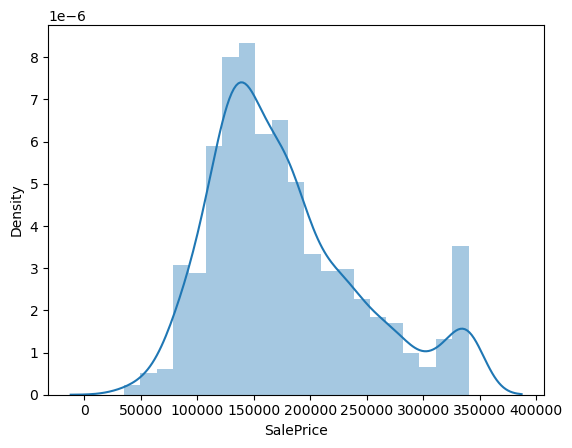

In [3039]:
sns.distplot(y['SalePrice'])

In [3040]:
# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be 

In [3070]:
# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

## Step 6: Simple linear model <a class="anchor" id="sml"></a>

In [3171]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print(col_name.ljust(20),': ', linear_reg_model.coef_[0][idx])

LotFrontage          :  0.0012819477143296723
LotArea              :  0.06250634444087748
OverallQual          :  0.2141176536263476
OverallCond          :  0.10679104661682723
YearRemodAdd         :  0.026323049390859284
BsmtFinSF1           :  0.012965303773834017
BsmtUnfSF            :  -0.07563293722031869
TotalBsmtSF          :  0.14222930767499758
2ndFlrSF             :  0.05405097114401228
GrLivArea            :  0.3314721894152433
BedroomAbvGr         :  -0.018872039083137202
Fireplaces           :  0.06298492869076663
GarageCars           :  0.11258036427693509
log_MSSubClass       :  -0.061235773610810784
log_MasVnrArea       :  0.040667712155974145
log_WoodDeckSF       :  0.01597773442105743
log_OpenPorchSF      :  0.010525701051789729
Year_built_vs_sold   :  -0.13334553505245667
LotShape_Other       :  0.0011067120932180593
LotShape_Reg         :  -0.015900348698282264
LotConfig_Other      :  -0.004322811737522298
HouseStyle_2Story    :  -0.04398070849500979
HouseStyle_Othe

## Step 7: Regularized Ridge Model <a class="anchor" id="rrm"></a>

In [3207]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.logspace(-6, 6, 13)}
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_grid.fit(X_train, y_train)

best_ridge_alpha = ridge_grid.best_params_['alpha']
print(best_ridge_alpha)

10.0


In [3208]:
ridge = Ridge(alpha=best_ridge_alpha) #coefficients are prevented to become too big by this alpha value
ridge.fit(X_train,y_train)
for i,col_name in enumerate(X_train.columns):   
    print(col_name.ljust(20),': ', ridge.coef_[0][i])

LotFrontage          :  0.0020890737580669685
LotArea              :  0.06360913215776552
OverallQual          :  0.21162910563118711
OverallCond          :  0.10257107338614654
YearRemodAdd         :  0.029597539294473556
BsmtFinSF1           :  0.023302008773089855
BsmtUnfSF            :  -0.06451582919529417
TotalBsmtSF          :  0.13594439088227825
2ndFlrSF             :  0.05745434531047695
GrLivArea            :  0.3177569280076294
BedroomAbvGr         :  -0.015053028671179147
Fireplaces           :  0.0642857852162609
GarageCars           :  0.11394375637016342
log_MSSubClass       :  -0.05991778171145334
log_MasVnrArea       :  0.02887553542915108
log_WoodDeckSF       :  0.016843137415485376
log_OpenPorchSF      :  0.011412433254485262
Year_built_vs_sold   :  -0.12539391905306307
LotShape_Other       :  0.0014212404725956042
LotShape_Reg         :  -0.016536378482998874
LotConfig_Other      :  -0.004364555034530347
HouseStyle_2Story    :  -0.04085286203367331
HouseStyle_Other

## Step 8: Regularized LASSO Model <a class="anchor" id="rm"></a>

In [3210]:
param_grid = {'alpha': np.logspace(-6, 6, 13)}
lasso_grid = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_grid.fit(X_train, y_train)

best_lasso_alpha = lasso_grid.best_params_['alpha']
print(best_lasso_alpha)

0.01


In [3212]:
lasso = Lasso(alpha=best_lasso_alpha)
lasso.fit(X_train,y_train)
for i,col_name in enumerate(X_train):
    print(col_name.ljust(20),': ', lasso.coef_[i])

LotFrontage          :  0.0
LotArea              :  0.06554568792616515
OverallQual          :  0.2237405638504519
OverallCond          :  0.08456788476332955
YearRemodAdd         :  0.03404840421825073
BsmtFinSF1           :  0.07193383786573546
BsmtUnfSF            :  -0.008729471097181475
TotalBsmtSF          :  0.08990796217708441
2ndFlrSF             :  0.0
GrLivArea            :  0.3267743966823341
BedroomAbvGr         :  -0.0
Fireplaces           :  0.059512879775226374
GarageCars           :  0.10681629892692684
log_MSSubClass       :  -0.0507145088551079
log_MasVnrArea       :  0.0
log_WoodDeckSF       :  0.015980900506528953
log_OpenPorchSF      :  0.0036232699574414197
Year_built_vs_sold   :  -0.1105891061843698
LotShape_Other       :  0.0
LotShape_Reg         :  -0.01356967258689245
LotConfig_Other      :  -0.0
HouseStyle_2Story    :  -0.0
HouseStyle_Other     :  -0.0
RoofStyle_Other      :  0.011362409969480321
Exterior1st_VinylSd  :  0.0
Exterior2nd_VinylSd  :  0.0
MasVnr

## Step 9: Comparring the R2 scores of models <a class="anchor" id="compare"></a>

In [3213]:
print(linear_reg_model.score(X_train, y_train))
print(linear_reg_model.score(X_test, y_test))

0.878952034592212
0.9059425352118169


In [3214]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8788621915967558
0.9056873702460044


In [3215]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8765362917657441
0.9038550036470971


Based on the score, regression and ridge model are similar but the lasso model goes down

In [3216]:
lm_pred = linear_reg_model.predict(X_test)
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
lasso_pred = lasso_pred.reshape(-1, 1)

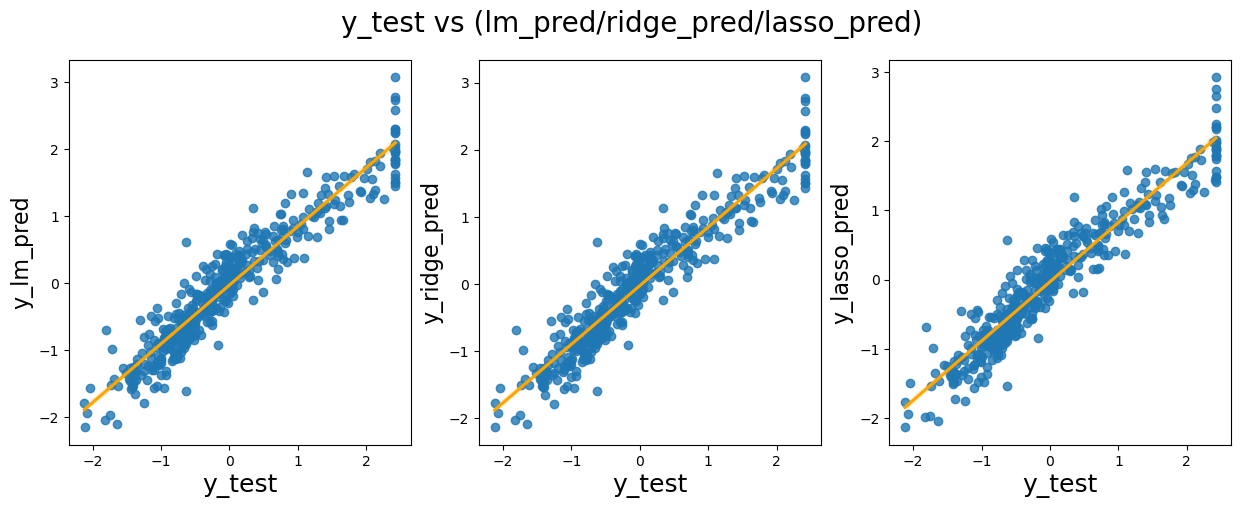

In [3217]:
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

plt.suptitle('y_test vs (lm_pred/ridge_pred/lasso_pred)', fontsize = 20)              # Plot heading
plt.subplot(1, 3, 1)
sns.regplot(x=y_test, y=lm_pred, data=regression_model, line_kws={"color": "orange"});
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_lm_pred', fontsize = 16)

plt.subplot(1, 3, 2)
sns.regplot(x=y_test, y=ridge_pred, data=ridge, line_kws={"color": "orange"});
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_ridge_pred', fontsize = 16) 

plt.subplot(1, 3, 3)
sns.regplot(x=y_test, y=lasso_pred, data=lasso, line_kws={"color": "orange"});
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_lasso_pred', fontsize = 16) 

plt.show();

In [3218]:
lm_residuals = y_test - lm_pred
ridge_residuals = y_test - ridge_pred
lasso_residuals = y_test - lasso_pred

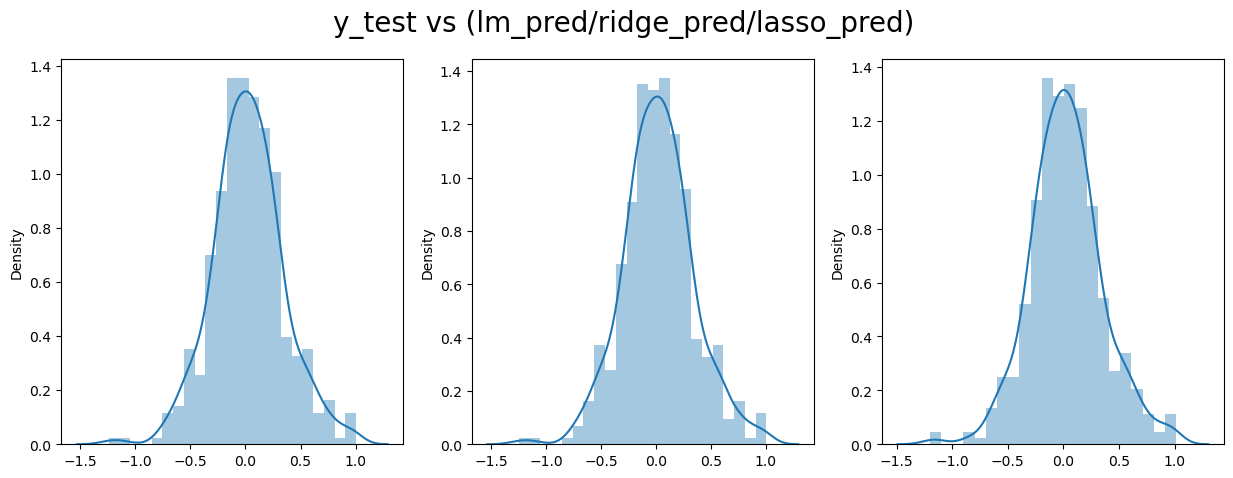

In [3219]:
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

plt.suptitle('y_test vs (lm_pred/ridge_pred/lasso_pred)', fontsize = 20)              # Plot heading
plt.subplot(1, 3, 1)
sns.distplot(lm_residuals,kde=True)

plt.subplot(1, 3, 2)
sns.distplot(ridge_residuals,kde=True)

plt.subplot(1, 3, 3)
sns.distplot(lasso_residuals,kde=True)

plt.show();

In [3220]:
linear_reg_model_coefficients = linear_reg_model.coef_
ridge_coefficients = ridge.coef_
lasso_coefficients = lasso.coef_
feature_names = X_train.columns

# Create a DataFrame with feature names and coefficients
lm_coef_val = pd.DataFrame({'Feature': feature_names, 'lm_Coefficient': linear_reg_model_coefficients[0]})
ridge_coef_val = pd.DataFrame({'Feature': feature_names, 'ridge_Coefficient': ridge_coefficients[0]})
lasso_coef_val = pd.DataFrame({'Feature': feature_names, 'lasso_Coefficient': lasso_coefficients[0]})

# Sort the DataFrame by the absolute values of coefficients in descending order
print(lm_coef_val.sort_values(by='lm_Coefficient', ascending=False).to_string(index=False))

            Feature  lm_Coefficient
          GrLivArea        0.331472
        OverallQual        0.214118
        TotalBsmtSF        0.142229
         GarageCars        0.112580
        OverallCond        0.106791
   Foundation_PConc        0.066139
         Fireplaces        0.062985
            LotArea        0.062506
           2ndFlrSF        0.054051
 BsmtExposure_Other        0.050346
  KitchenQual_Other        0.043004
    MasVnrType_None        0.042909
Exterior1st_VinylSd        0.041682
     log_MasVnrArea        0.040668
     BsmtQual_Other        0.039679
       YearRemodAdd        0.026323
    RoofStyle_Other        0.016331
     log_WoodDeckSF        0.015978
         BsmtFinSF1        0.012965
    log_OpenPorchSF        0.010526
   Foundation_Other        0.006768
   GarageFinish_Unf        0.002129
        LotFrontage        0.001282
     LotShape_Other        0.001107
   MasVnrType_Other       -0.000512
        BsmtQual_TA       -0.002073
    ExterQual_Other       -0

In [3221]:
print(ridge_coef_val.sort_values(by='ridge_Coefficient', ascending=False).to_string(index=False))

            Feature  ridge_Coefficient
          GrLivArea           0.317757
        OverallQual           0.211629
        TotalBsmtSF           0.135944
         GarageCars           0.113944
        OverallCond           0.102571
         Fireplaces           0.064286
   Foundation_PConc           0.063974
            LotArea           0.063609
           2ndFlrSF           0.057454
 BsmtExposure_Other           0.049948
  KitchenQual_Other           0.042663
     BsmtQual_Other           0.040113
    MasVnrType_None           0.030760
       YearRemodAdd           0.029598
Exterior1st_VinylSd           0.029013
     log_MasVnrArea           0.028876
         BsmtFinSF1           0.023302
    RoofStyle_Other           0.017703
     log_WoodDeckSF           0.016843
    log_OpenPorchSF           0.011412
   Foundation_Other           0.005774
        LotFrontage           0.002089
     LotShape_Other           0.001421
   GarageFinish_Unf           0.000265
   MasVnrType_Other      

In [3222]:
print(lasso_coef_val.sort_values(by='lasso_Coefficient', ascending=False).to_string(index=False))

            Feature  lasso_Coefficient
        LotFrontage                0.0
  HouseStyle_2Story                0.0
    RoofStyle_Other                0.0
Exterior1st_VinylSd                0.0
Exterior2nd_VinylSd                0.0
    MasVnrType_None                0.0
   MasVnrType_Other                0.0
    ExterQual_Other                0.0
       ExterQual_TA                0.0
   Foundation_Other                0.0
   Foundation_PConc                0.0
     BsmtQual_Other                0.0
        BsmtQual_TA                0.0
 BsmtExposure_Other                0.0
   BsmtFinType1_Unf                0.0
    HeatingQC_Other                0.0
  KitchenQual_Other                0.0
     KitchenQual_TA                0.0
   GarageType_Other                0.0
   HouseStyle_Other                0.0
    LotConfig_Other                0.0
            LotArea                0.0
       LotShape_Reg                0.0
        OverallQual                0.0
        OverallCond      

In [3223]:
coef_index = ridge_coef_val.Feature.tolist()
coef_value = ridge_coef_val.ridge_Coefficient.tolist()
fmt_str = ""
for idx,val in zip(coef_index, coef_value):
    end_str = ''
    if coef_index[-1] != idx:
        end_str = ' + '
    fmt_str = fmt_str + f"({val} * {idx})" + end_str
cnt = 'cnt = ' + fmt_str

In [3224]:
cnt

'cnt = (0.0020890737580669685 * LotFrontage) + (0.06360913215776552 * LotArea) + (0.21162910563118711 * OverallQual) + (0.10257107338614654 * OverallCond) + (0.029597539294473556 * YearRemodAdd) + (0.023302008773089855 * BsmtFinSF1) + (-0.06451582919529417 * BsmtUnfSF) + (0.13594439088227825 * TotalBsmtSF) + (0.05745434531047695 * 2ndFlrSF) + (0.3177569280076294 * GrLivArea) + (-0.015053028671179147 * BedroomAbvGr) + (0.0642857852162609 * Fireplaces) + (0.11394375637016342 * GarageCars) + (-0.05991778171145334 * log_MSSubClass) + (0.02887553542915108 * log_MasVnrArea) + (0.016843137415485376 * log_WoodDeckSF) + (0.011412433254485262 * log_OpenPorchSF) + (-0.12539391905306307 * Year_built_vs_sold) + (0.0014212404725956042 * LotShape_Other) + (-0.016536378482998874 * LotShape_Reg) + (-0.004364555034530347 * LotConfig_Other) + (-0.04085286203367331 * HouseStyle_2Story) + (-0.008654479193166097 * HouseStyle_Other) + (0.017702540596868765 * RoofStyle_Other) + (0.02901280156845943 * Exterior

## Step 9: Double the alpha for Regularized Ridge Model and Lasso Model <a class="anchor" id="rrm"></a>

In [3225]:
ridge = Ridge(alpha=best_ridge_alpha * 2) #coefficients are prevented to become too big by this alpha value
ridge.fit(X_train,y_train)
for i,col_name in enumerate(X_train.columns):   
    print(col_name.ljust(20),': ', ridge.coef_[0][i])

LotFrontage          :  0.0029102703099615265
LotArea              :  0.06462416319143567
OverallQual          :  0.20915573727489625
OverallCond          :  0.09902717592296087
YearRemodAdd         :  0.03241213813416512
BsmtFinSF1           :  0.031095197396057574
BsmtUnfSF            :  -0.05595397372387346
TotalBsmtSF          :  0.1314630984556776
2ndFlrSF             :  0.05979539551507116
GrLivArea            :  0.3058271008805854
BedroomAbvGr         :  -0.011634477867834591
Fireplaces           :  0.0654714060380291
GarageCars           :  0.11489136998401603
log_MSSubClass       :  -0.05855432285112042
log_MasVnrArea       :  0.02278563544724297
log_WoodDeckSF       :  0.017596222850215792
log_OpenPorchSF      :  0.012310349122525776
Year_built_vs_sold   :  -0.11858421007661983
LotShape_Other       :  0.001653743706280938
LotShape_Reg         :  -0.017023721262913676
LotConfig_Other      :  -0.004400997836773794
HouseStyle_2Story    :  -0.037881533151822966
HouseStyle_Other  

In [3226]:
lasso = Lasso(alpha=best_lasso_alpha * 2)
lasso.fit(X_train,y_train)
for i,col_name in enumerate(X_train):
    print(col_name.ljust(20),': ', lasso.coef_[i])

LotFrontage          :  0.0
LotArea              :  0.06984250774103073
OverallQual          :  0.2349071646305705
OverallCond          :  0.06550525067782445
YearRemodAdd         :  0.0403821275502701
BsmtFinSF1           :  0.08354441789146348
BsmtUnfSF            :  -0.0
TotalBsmtSF          :  0.0922927798525489
2ndFlrSF             :  0.0
GrLivArea            :  0.3137232537601882
BedroomAbvGr         :  -0.0
Fireplaces           :  0.05531300902726036
GarageCars           :  0.10221396334813719
log_MSSubClass       :  -0.037458107187220036
log_MasVnrArea       :  0.0
log_WoodDeckSF       :  0.012500516100322523
log_OpenPorchSF      :  0.0
Year_built_vs_sold   :  -0.10078389640642611
LotShape_Other       :  0.0
LotShape_Reg         :  -0.010013631035269805
LotConfig_Other      :  0.0
HouseStyle_2Story    :  -0.0
HouseStyle_Other     :  -0.0
RoofStyle_Other      :  0.005432695497047559
Exterior1st_VinylSd  :  0.0
Exterior2nd_VinylSd  :  0.0
MasVnrType_None      :  -0.0
MasVnrType_O

In [3227]:
lm_pred = linear_reg_model.predict(X_test)
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

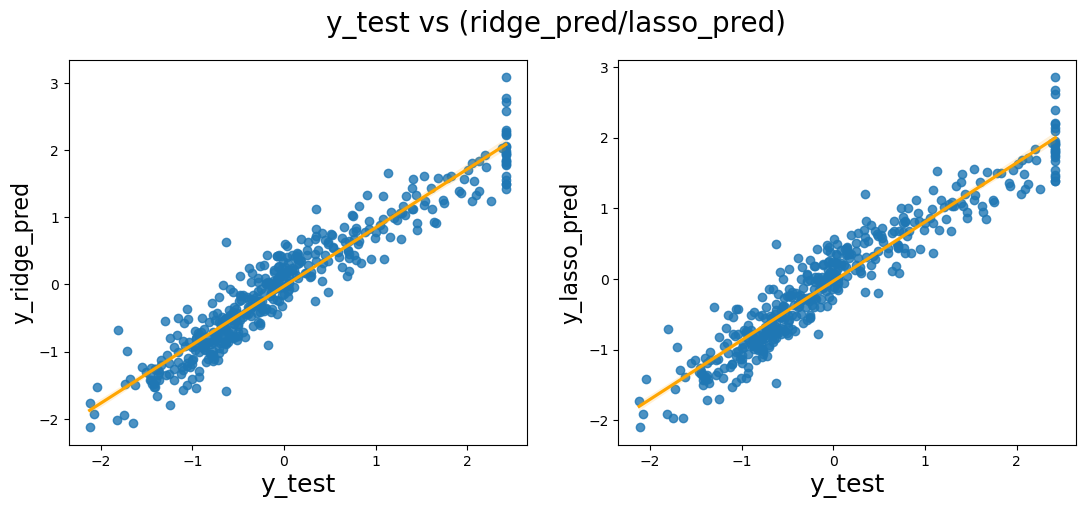

In [3228]:
plt.figure(figsize=(13, 5))  # Adjust the figure size as needed

plt.suptitle('y_test vs (ridge_pred/lasso_pred)', fontsize = 20)              # Plot heading
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=ridge_pred, data=ridge, line_kws={"color": "orange"});
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_ridge_pred', fontsize = 16) 

plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=lasso_pred, data=lasso, line_kws={"color": "orange"});
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_lasso_pred', fontsize = 16) 

plt.show();

In [3231]:
ridge_coefficients = ridge.coef_
lasso_coefficients = lasso.coef_
feature_names = X_train.columns

# Create a DataFrame with feature names and coefficients
ridge_coef_val = pd.DataFrame({'Feature': feature_names, 'double_ridge_Coefficient': ridge_coefficients[0]})
lasso_coef_val = pd.DataFrame({'Feature': feature_names, 'double_lasso_Coefficient': lasso_coefficients[0]})

# Sort the DataFrame by the absolute values of coefficients in descending order
print(ridge_coef_val.sort_values(by='double_ridge_Coefficient', ascending=False).to_string(index=False))

            Feature  double_ridge_Coefficient
          GrLivArea                  0.305827
        OverallQual                  0.209156
        TotalBsmtSF                  0.131463
         GarageCars                  0.114891
        OverallCond                  0.099027
         Fireplaces                  0.065471
            LotArea                  0.064624
   Foundation_PConc                  0.062316
           2ndFlrSF                  0.059795
 BsmtExposure_Other                  0.049569
  KitchenQual_Other                  0.042335
     BsmtQual_Other                  0.040397
       YearRemodAdd                  0.032412
         BsmtFinSF1                  0.031095
    MasVnrType_None                  0.024162
     log_MasVnrArea                  0.022786
Exterior1st_VinylSd                  0.021845
    RoofStyle_Other                  0.018867
     log_WoodDeckSF                  0.017596
    log_OpenPorchSF                  0.012310
   Foundation_Other               

In [3232]:
print(lasso_coef_val.sort_values(by='double_lasso_Coefficient', ascending=False).to_string(index=False))

            Feature  double_lasso_Coefficient
        LotFrontage                       0.0
  HouseStyle_2Story                       0.0
    RoofStyle_Other                       0.0
Exterior1st_VinylSd                       0.0
Exterior2nd_VinylSd                       0.0
    MasVnrType_None                       0.0
   MasVnrType_Other                       0.0
    ExterQual_Other                       0.0
       ExterQual_TA                       0.0
   Foundation_Other                       0.0
   Foundation_PConc                       0.0
     BsmtQual_Other                       0.0
        BsmtQual_TA                       0.0
 BsmtExposure_Other                       0.0
   BsmtFinType1_Unf                       0.0
    HeatingQC_Other                       0.0
  KitchenQual_Other                       0.0
     KitchenQual_TA                       0.0
   GarageType_Other                       0.0
   HouseStyle_Other                       0.0
    LotConfig_Other               

## Step 10: Drop top 5 columns <a class="anchor" id="top5"></a>

In [3235]:
top_5_columns = ['GrLivArea','OverallQual','TotalBsmtSF','GarageCars','OverallCond']

X_filtered = X.drop(columns=top_5_columns)
X_scaled = preprocessing.scale(X_filtered)
X_scaled = pd.DataFrame(X_scaled, columns=X_filtered.columns)  # ideally the training and test should be 

# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [3242]:
lasso = Lasso(alpha=best_lasso_alpha/2)
lasso.fit(X_train,y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8087177477278973
0.8431528548554411


In [3243]:
ridge = Ridge(alpha=best_ridge_alpha/2) #coefficients are prevented to become too big by this alpha value
ridge.fit(X_train,y_train)
ridge_coefficients = ridge.coef_
ridge_coef_val = pd.DataFrame({'Feature': X_train.columns, 'ridge_Coefficient': ridge_coefficients[0]})

print(ridge_coef_val.sort_values(by='ridge_Coefficient', ascending=False).to_string(index=False))

            Feature  ridge_Coefficient
           2ndFlrSF           0.292151
         BsmtFinSF1           0.253115
          BsmtUnfSF           0.201824
         Fireplaces           0.142483
            LotArea           0.138764
       YearRemodAdd           0.135489
     log_MasVnrArea           0.085499
   Foundation_PConc           0.078394
     BsmtQual_Other           0.077304
 BsmtExposure_Other           0.070907
    RoofStyle_Other           0.063125
    MasVnrType_None           0.056180
       BedroomAbvGr           0.045841
   Foundation_Other           0.044915
  KitchenQual_Other           0.040995
    log_OpenPorchSF           0.037061
        LotFrontage           0.027860
     log_WoodDeckSF           0.026047
   MasVnrType_Other           0.007102
    ExterQual_Other           0.006238
   HouseStyle_Other          -0.005908
     LotShape_Other          -0.006210
   GarageType_Other          -0.009798
       LotShape_Reg          -0.010894
    LotConfig_Other      

## Conclusion  <a class="anchor" id="conclusions"></a>

* Based on the score, regression and ridge model are similar but the lasso model goes down
* Coefficients based on ridge model:
   - Positive Coefficients: LotFrontage, LotArea, OverallQual, OverallCond, YearRemodAdd, BsmtFinSF1, TotalBsmtSF, 2ndFlrSF, GrLivArea, Fireplaces, GarageCars, MasVnrArea, WoodDeckSF, OpenPorchSF, Exterior1st_VinylSd, Foundation_PConc, GarageFinish_Unf
   - Negative Coefficients: BsmtUnfSF,  BedroomAbvGr,  MSSubClass, Year_built_vs_sold, LotShape_Reg, HouseStyle_2Story, Exterior2nd_VinylSd, ExterQual_TA, BsmtQual_TA, BsmtFinType1_Unf, KitchenQual_TA.
* There is not much change between the Alpha value and Doubled Alpha value for ridge and lasso model coefficients